<a href="https://colab.research.google.com/github/ronniejortiz/Battle-Ship/blob/main/pitcher_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pybaseball
import pybaseball as pyb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 978.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 14.5 MB/s eta 0:00:00


In [4]:
# Define font properties for general text
font_properties = {'family': 'DejVu Sans', 'size': 12}

# Define font properties for titles
font_properties_titles = {'family': 'DejaVu Sans', 'size': 20}

# Define font properties for axes labels
font_properties_axes = {'family': 'DejaVu', 'size': 16}

# Set the theme for seaborn plots
sns.set_theme(style='whitegrid',
              palette='deep',
              font='DejaVu Sans',
              font_scale=1.5,
              color_codes=True,
              rc=None)

#Import matplotlib
import matplotlib as mpl

#Set the resolution of the figures to 300 DPI
mpl.rcParams['figure.dpi'] = 300

## Create Plot

<function matplotlib.pyplot.show(close=None, block=None)>

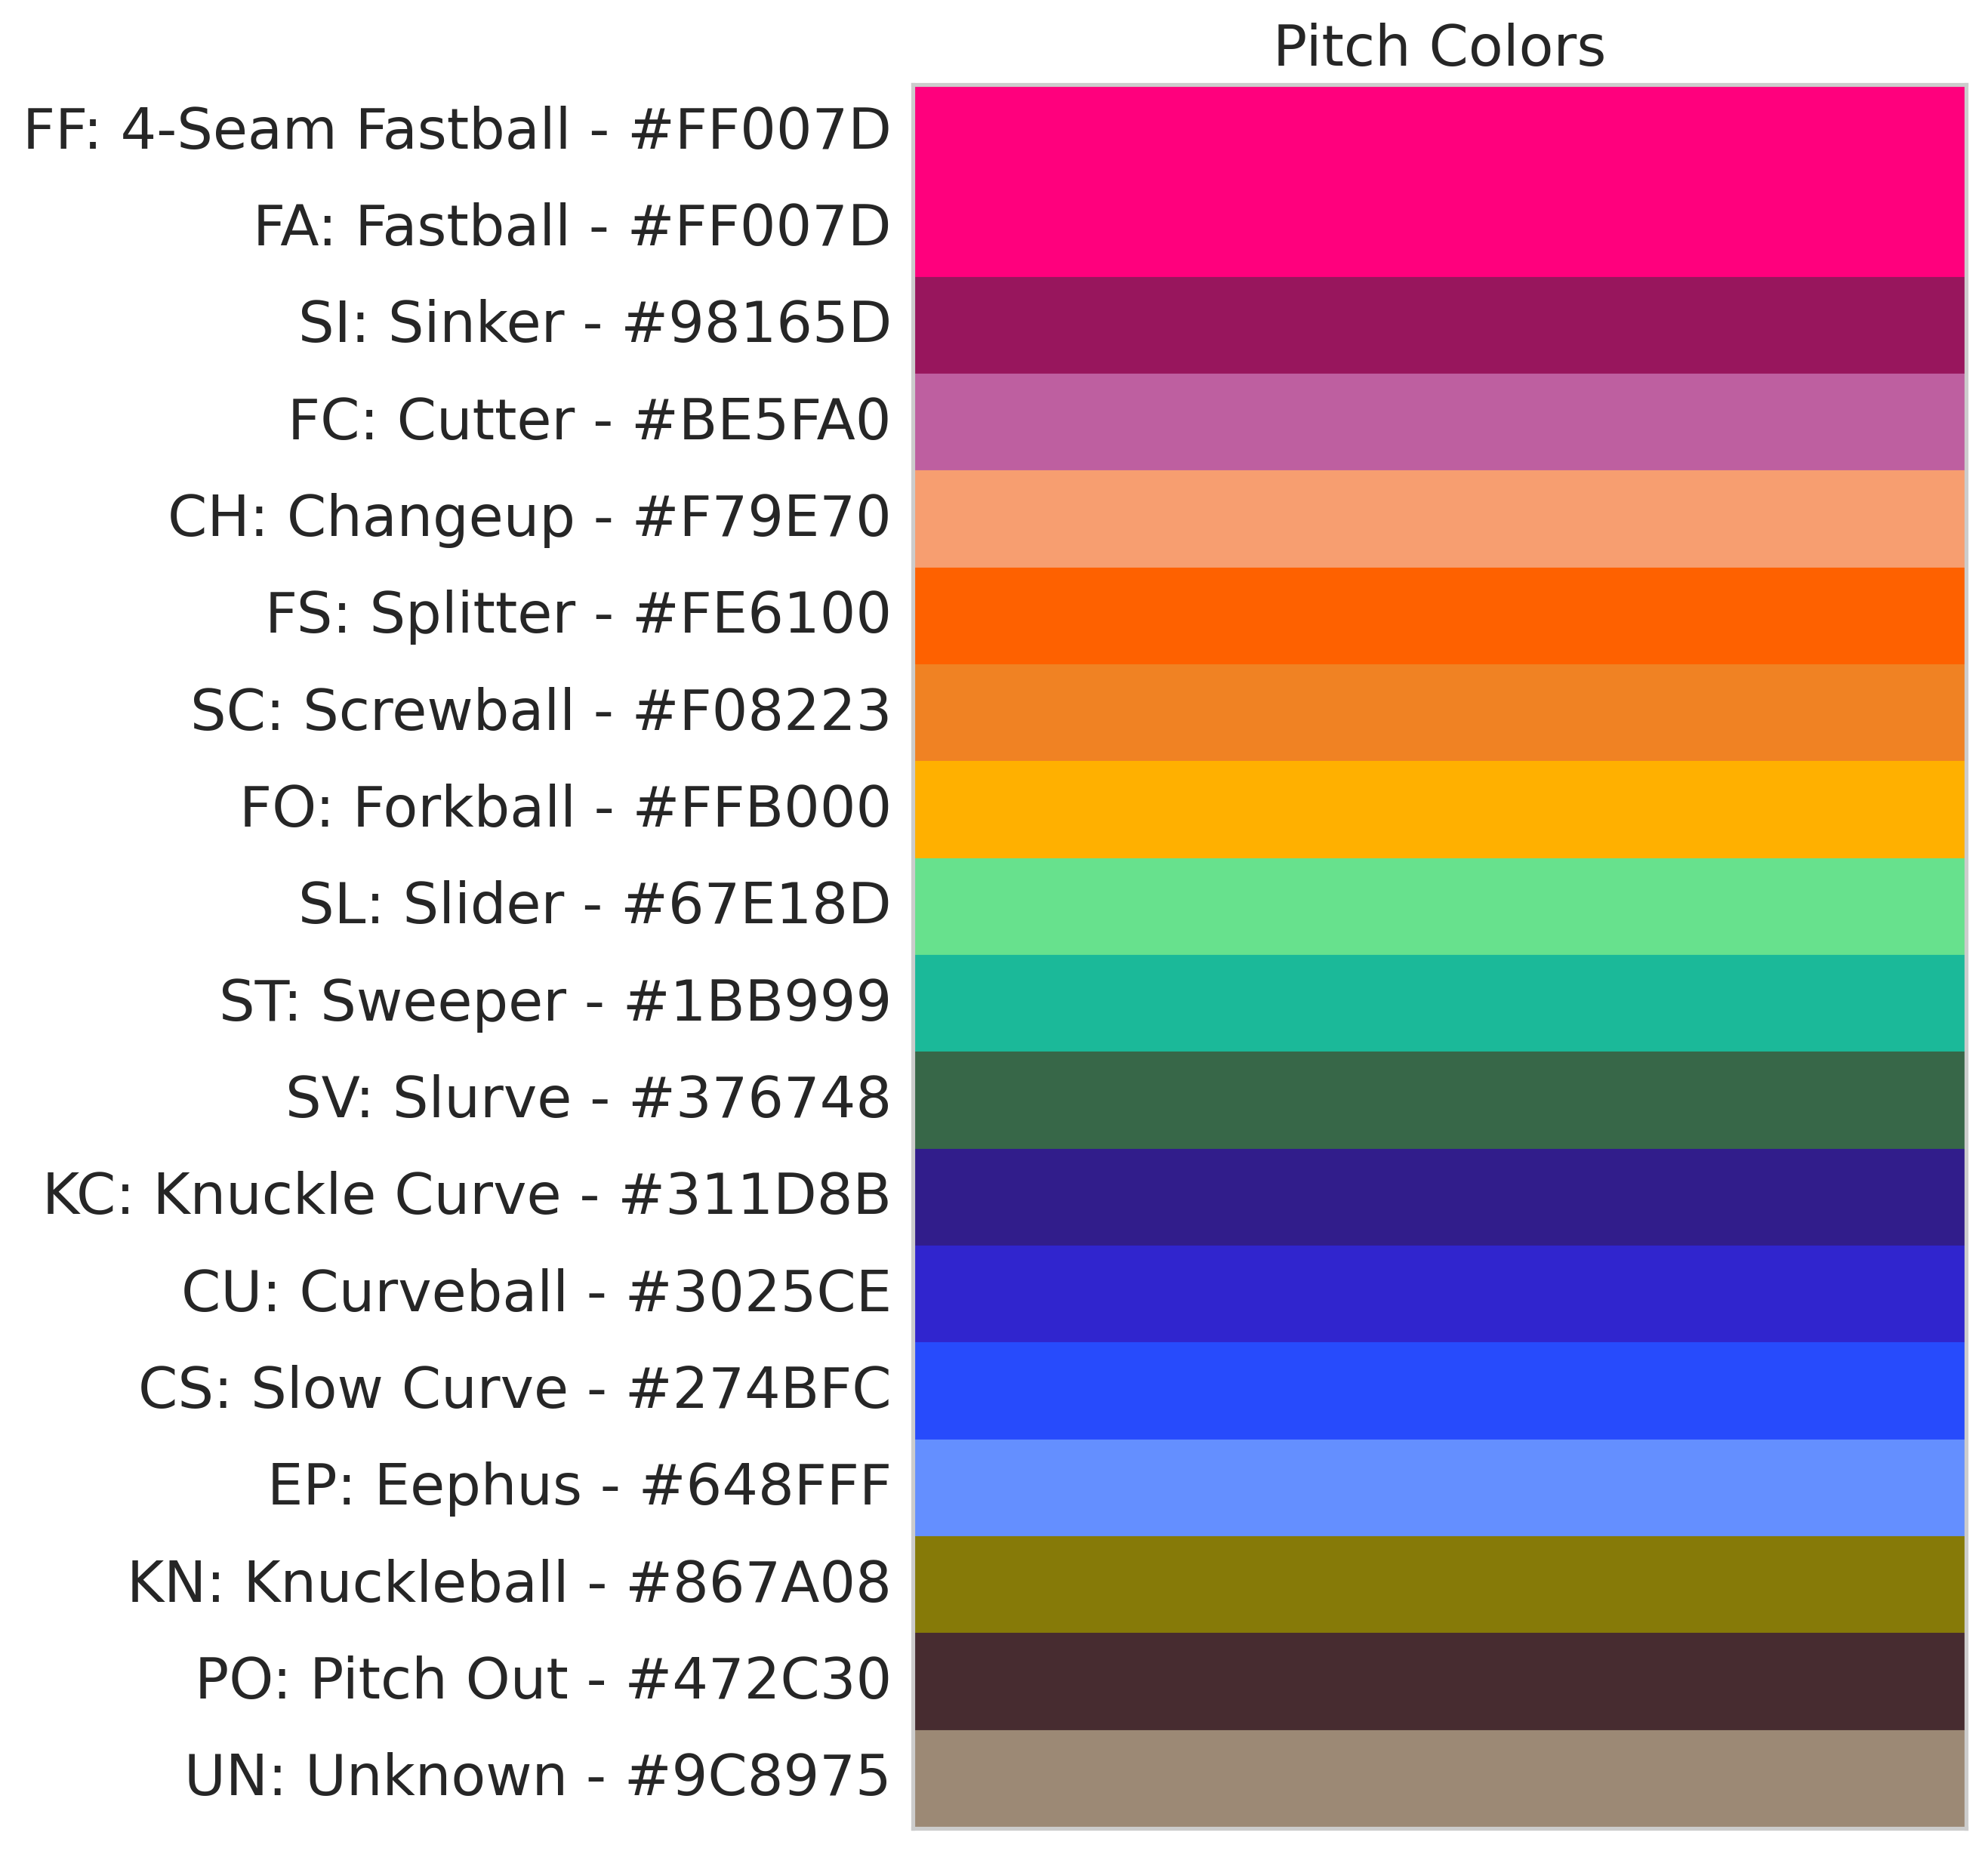

In [10]:
### Pitch Colors ###
pitch_colors = {
    ## Fastballs ##
    'FF': {'color': '#FF007D', 'name': '4-Seam Fastball'},
    'FA': {'color': '#FF007D', 'name': 'Fastball'},
    'SI': {'color': '#98165D', 'name': 'Sinker'},
    'FC': {'color': '#BE5FA0', 'name': 'Cutter'},

    ## Offspeed ##
    'CH': {'color': '#F79E70', 'name': 'Changeup'},
    'FS': {'color': '#FE6100', 'name': 'Splitter'},
    'SC': {'color': '#F08223', 'name': 'Screwball'},
    'FO': {'color': '#FFB000', 'name': 'Forkball'},

    ## Sliders ##
    'SL': {'color': '#67E18D', 'name': 'Slider'},
    'ST': {'color': '#1BB999', 'name': 'Sweeper'},
    'SV': {'color': '#376748', 'name': 'Slurve'},

    ## Curveballs ##
    'KC': {'color': '#311D8B', 'name': 'Knuckle Curve'},
    'CU': {'color': '#3025CE', 'name': 'Curveball'},
    'CS': {'color': '#274BFC', 'name': 'Slow Curve'},
    'EP': {'color': '#648FFF', 'name': 'Eephus'},

    ## Others ##
    'KN': {'color': '#867A08', 'name': 'Knuckleball'},
    'PO': {'color': '#472C30', 'name': 'Pitch Out'},
    'UN': {'color': '#9C8975', 'name': 'Unknown'},
}

# Create a dictionary mapping pitch types to their colors
dict_color = dict(zip(pitch_colors.keys(), [pitch_colors[key]['color'] for key in pitch_colors]))

# Create a dictionary mapping pitch types to their colors
dict_pitch = dict(zip(pitch_colors.keys(), [pitch_colors[key]['name'] for key in pitch_colors]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 10))

# Plot a square for each pitch type with its corresponding color
for i, pitch_type in enumerate(pitch_colors):
  ax.add_patch(plt.Rectangle((0, i), 1, 1, color=pitch_colors[pitch_type]['color']))
  ax.text(-0.02, i + 0.5, f'{pitch_type}: {pitch_colors[pitch_type]["name"]} - {pitch_colors[pitch_type]["color"]}', va='center', ha='right')

# Set the y-axis limits and remove ticks
ax.set_ylim(0, len(pitch_colors))
ax.set_yticks([])
ax.set_ylabel('')

# Remove the x-axis
ax.set_xticks([])
ax.set_xlabel('')
ax.invert_yaxis()

# Set the title
ax.set_title('Pitch Colors')

# Show the plot
plt.show

## Data Gathering

In [67]:
print(pyb.playerid_lookup('Skubal', 'Tarik'))
pitcher_id = 669373
df_pyb = pyb.statcast_pitcher('2024-03-28', '2024-10-01', pitcher_id)
df_pyb.head()

  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0    skubal      tarik     669373  skubt001  skubata01          22267   

   mlb_played_first  mlb_played_last  
0            2020.0           2024.0  
Gathering Player Data


pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2024-08-18           98.1           1.61           6.25   
1         FF  2024-08-18           97.2           1.55           6.33   
2         CH  2024-08-18           83.5           1.81           6.22   
3         FF  2024-08-18           96.6           1.68           6.27   
4         FF  2024-08-18           96.9           1.59           6.21   

     player_name  batter  pitcher     events      description  ...  \
0  Skubal, Tarik  691176   669373  force_out    hit_into_play  ...   
1  Skubal, Tarik  691176   669373        NaN             ball  ...   
2  Skubal, Tarik  691176   669373        NaN             ball  ...   
3  Skubal, Tarik  691176   669373        NaN  swinging_strike  ...   
4  Skubal, Tarik  519317   669373       walk             ball  ...   

   post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
0                0               1               0                    NaN   
1                0               1               0                    NaN   
2                0               1               0                    NaN   
3                0               1               0                    NaN   
4                0               1               0                    NaN   

   of_fielding_alignment spin_axis delta_home_win_exp delta_run_exp bat_speed  \
0                    NaN     154.0              0.026        -0.269       NaN   
1                    NaN     152.0              0.000         0.050       NaN   
2                    NaN     107.0              0.000         0.029       NaN   
3                    NaN     150.0              0.000        -0.042       NaN   
4                    NaN     146.0             -0.014         0.066       NaN   

  swing_length  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 94 columns]

In [13]:
# Data processing
def df_processing(df_pyb: pd.DataFrame):
  df = df_pyb.copy()
  # define the codes for different types of swings and whiffs
  swing_code = ['foul_bunt','foul','hit_into_play','swinging_strike', 'foul_tip', 'swinging_strike_blocked','missed_bunt','bunt_foul_tip']
  whiff_code = ['swinging_strike', 'foul_tip', 'swinging_strike_blocked']

  # Create new columns in the DataFrame to indicate swing, whiff, in-zone, outzone, and chase
  df['swing'] = (df['description'].isin(swing_code))
  df['whiff'] = (df['description'].isin(whiff_code))
  df['in_zone'] = (df['zone'] < 10)
  df['out_zone'] = (df['zone'] > 10)
  df['chase'] = (df.in_zone==False) & (df.swing == 1)

  # Convert the pitch type to a categorical variable
  df['pfx_z'] = df['pfx_z'] * 12
  df['pfx_x'] = df['pfx_x'] * 12
  return df

df = df_processing(df_pyb)

In [25]:
# Comparison to league average
# Load data from CSV file
df_statcast_group = pd.read_csv('statcast_2024_grouped.csv')

## Plotting Functions

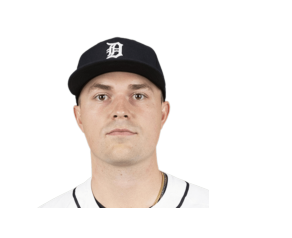

In [26]:
## GET PLAYER HEADSHOT

from PIL import Image
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to get an image from a URL and display it on the given axis
def player_headshot(pitcher_id: str, ax: plt.Axes):
  # Construct the URL for the player's headshot image
  url = f'https://img.mlbstatic.com/mlb-photos/image/'\
        f'upload/d_people:generic:headshot:67:current.png'\
        f'/w_640,q_auto:best/v1/people/{pitcher_id}/headshot/silo/current.png'

  # Send a GET request to the URL
  response = requests.get(url)

  # Open the image from the response content
  img = Image.open(BytesIO(response.content))

  # Display the image on the axis
  ax.set_xlim(0, 1.3)
  ax.set_ylim(0, 1)
  ax.imshow(img, extent=[0, 1, 0, 1], origin='upper')

  # Turn off the axis
  ax.axis('off')

# Call the player_headshot function witht the pitcher ID and current axis
player_headshot(pitcher_id, ax=plt.subplots(figsize=(1,1))[1])

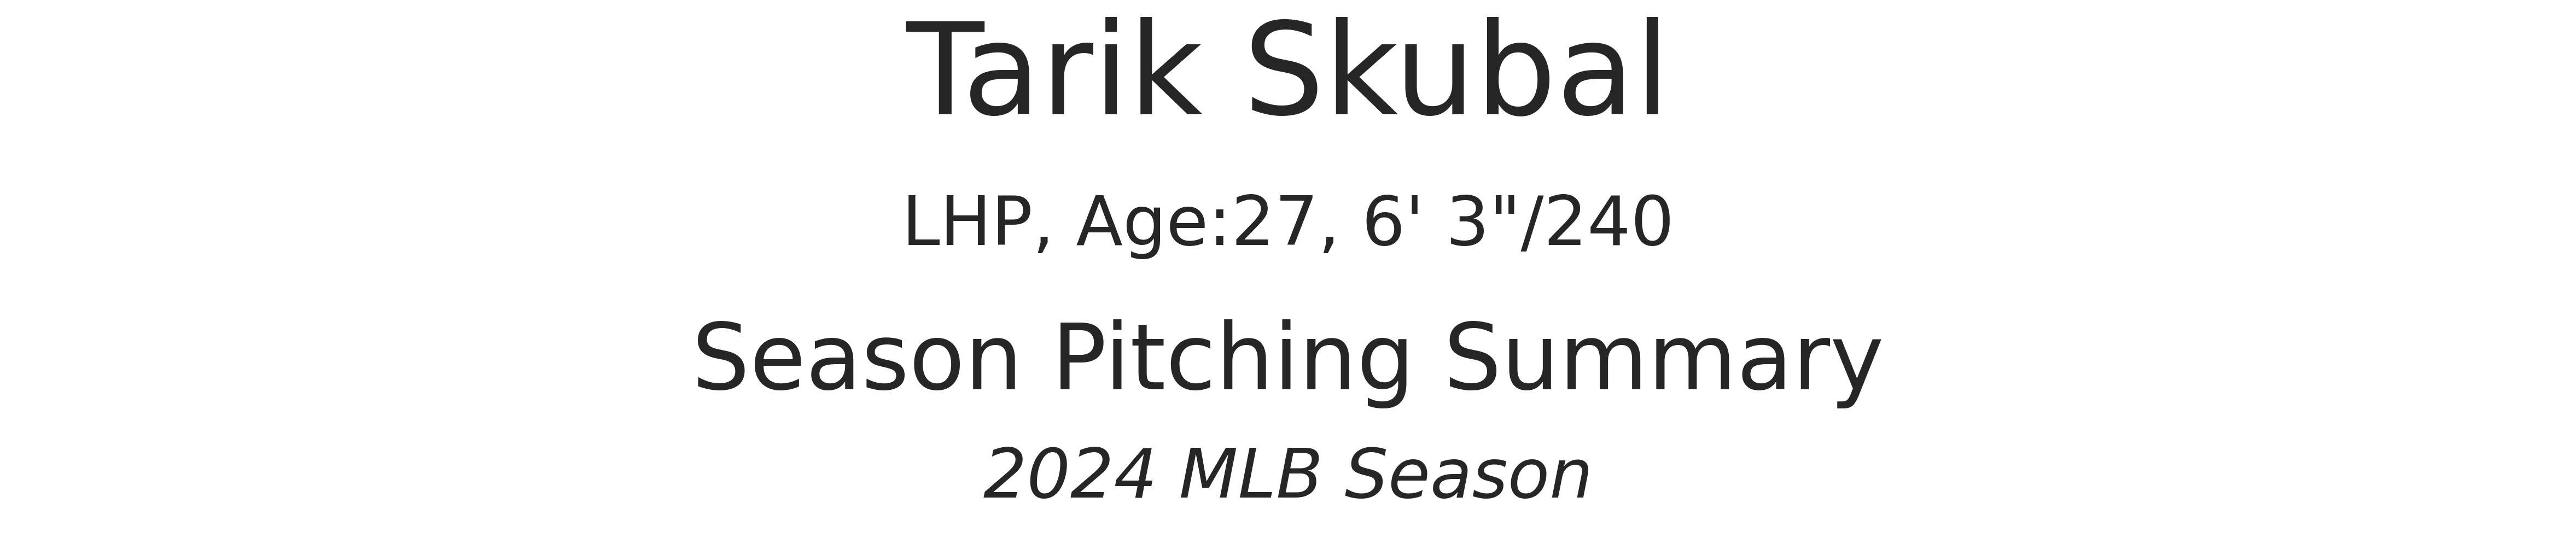

In [27]:
## GET PLAYER BIO

def player_bio(pitcher_id: str, ax: plt.Axes):
  # Construct the URL to fetch player data
  url = f"https://statsapi.mlb.com/api/v1/people?personIds={pitcher_id}&hydrate=currentTeam"

  # Send a GET request to the URL and parse the JSON response
  data = requests.get(url).json()

  # Extract player information from the JSON data
  player_name = data['people'][0]['fullName']
  pitcher_hand = data['people'][0]['pitchHand']['code']
  age = data['people'][0]['currentAge']
  height = data['people'][0]['height']
  weight = data['people'][0]['weight']

  # Display the player's name, handedness, age, height, and weight on the axis
  ax.text(0.5, 1, f'{player_name}', va='top', ha='center', fontsize=56)
  ax.text(0.5, 0.65, f'{pitcher_hand}HP, Age:{age}, {height}/{weight}', va='top', ha='center', fontsize=30)
  ax.text(0.5, 0.40, f'Season Pitching Summary', va='top', ha='center', fontsize=40)
  ax.text(0.5, 0.15, f'2024 MLB Season', va='top', ha='center', fontsize=30, fontstyle='italic')

  # Turn off the axis
  ax.axis('off')

# Call the player_bio function with the pitcher ID and a new axis of size 10x2
player_bio(pitcher_id, ax=plt.subplots(figsize=(20,4))[1])

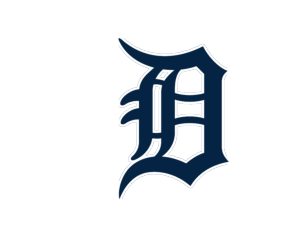

In [28]:
## GET TEAM LOGO

# List of MLB teams and their corresponding ESPN logo URLs
mlb_teams = [
    {"team": "AZ", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/ari.png&h=500&w=500"},
    {"team": "ATL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/atl.png&h=500&w=500"},
    {"team": "BAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/bal.png&h=500&w=500"},
    {"team": "BOS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/bos.png&h=500&w=500"},
    {"team": "CHC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/chc.png&h=500&w=500"},
    {"team": "CWS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/chw.png&h=500&w=500"},
    {"team": "CIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/cin.png&h=500&w=500"},
    {"team": "CLE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/cle.png&h=500&w=500"},
    {"team": "COL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/col.png&h=500&w=500"},
    {"team": "DET", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/det.png&h=500&w=500"},
    {"team": "HOU", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/hou.png&h=500&w=500"},
    {"team": "KC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/kc.png&h=500&w=500"},
    {"team": "LAA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/laa.png&h=500&w=500"},
    {"team": "LAD", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/lad.png&h=500&w=500"},
    {"team": "MIA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/mia.png&h=500&w=500"},
    {"team": "MIL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/mil.png&h=500&w=500"},
    {"team": "MIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/min.png&h=500&w=500"},
    {"team": "NYM", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/nym.png&h=500&w=500"},
    {"team": "NYY", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/nyy.png&h=500&w=500"},
    {"team": "OAK", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/oak.png&h=500&w=500"},
    {"team": "PHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/phi.png&h=500&w=500"},
    {"team": "PIT", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/pit.png&h=500&w=500"},
    {"team": "SD", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sd.png&h=500&w=500"},
    {"team": "SF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sf.png&h=500&w=500"},
    {"team": "SEA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sea.png&h=500&w=500"},
    {"team": "STL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/stl.png&h=500&w=500"},
    {"team": "TB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tb.png&h=500&w=500"},
    {"team": "TEX", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tex.png&h=500&w=500"},
    {"team": "TOR", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tor.png&h=500&w=500"},
    {"team": "WSH", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/wsh.png&h=500&w=500"}
]

# Create a DataFrame from the list of dictionaries
df_image = pd.DataFrame(mlb_teams)
image_dict = df_image.set_index('team')['logo_url'].to_dict()

# Define function to get logo photo
def plot_logo(pitcher_id: str, ax: plt.Axes):
  #Contrsuct the URL to fetch player data
  url = f"https://statsapi.mlb.com/api/v1/people?personIds={pitcher_id}&hydrate=currentTeam"

  # Send a GET request to the URL and parse the JSON response
  data = requests.get(url).json()

  # Contruct the URL to getch team data
  url_team = 'https://statsapi.mlb.com/' + data['people'][0]['currentTeam']['link']

  # Send a GET request to the team URL and parse the JSON response
  data_team = requests.get(url_team).json()

  # Extract the team abbreviation
  team_abb = data_team['teams'][0]['abbreviation']

  # Get the logo URL from the image dictionary using the team abbreviation
  logo_url = image_dict[team_abb]

  # Send a GET request to the logo URL
  response = requests.get(logo_url)

  # Open the image from the response content
  img = Image.open(BytesIO(response.content))

  # Display the image on the axis
  ax.set_xlim(0, 1.3)
  ax.set_ylim(0, 1)
  ax.imshow(img, extent=[0.3, 1.3, 0, 1], origin='upper')

  # Turn off the axis
  ax.axis('off')

#Call the plot_logo function with the pitcher ID and a new axis of size 1x1
plot_logo(pitcher_id, ax=plt.subplots(figsize=(1, 1))[1])

## Plots

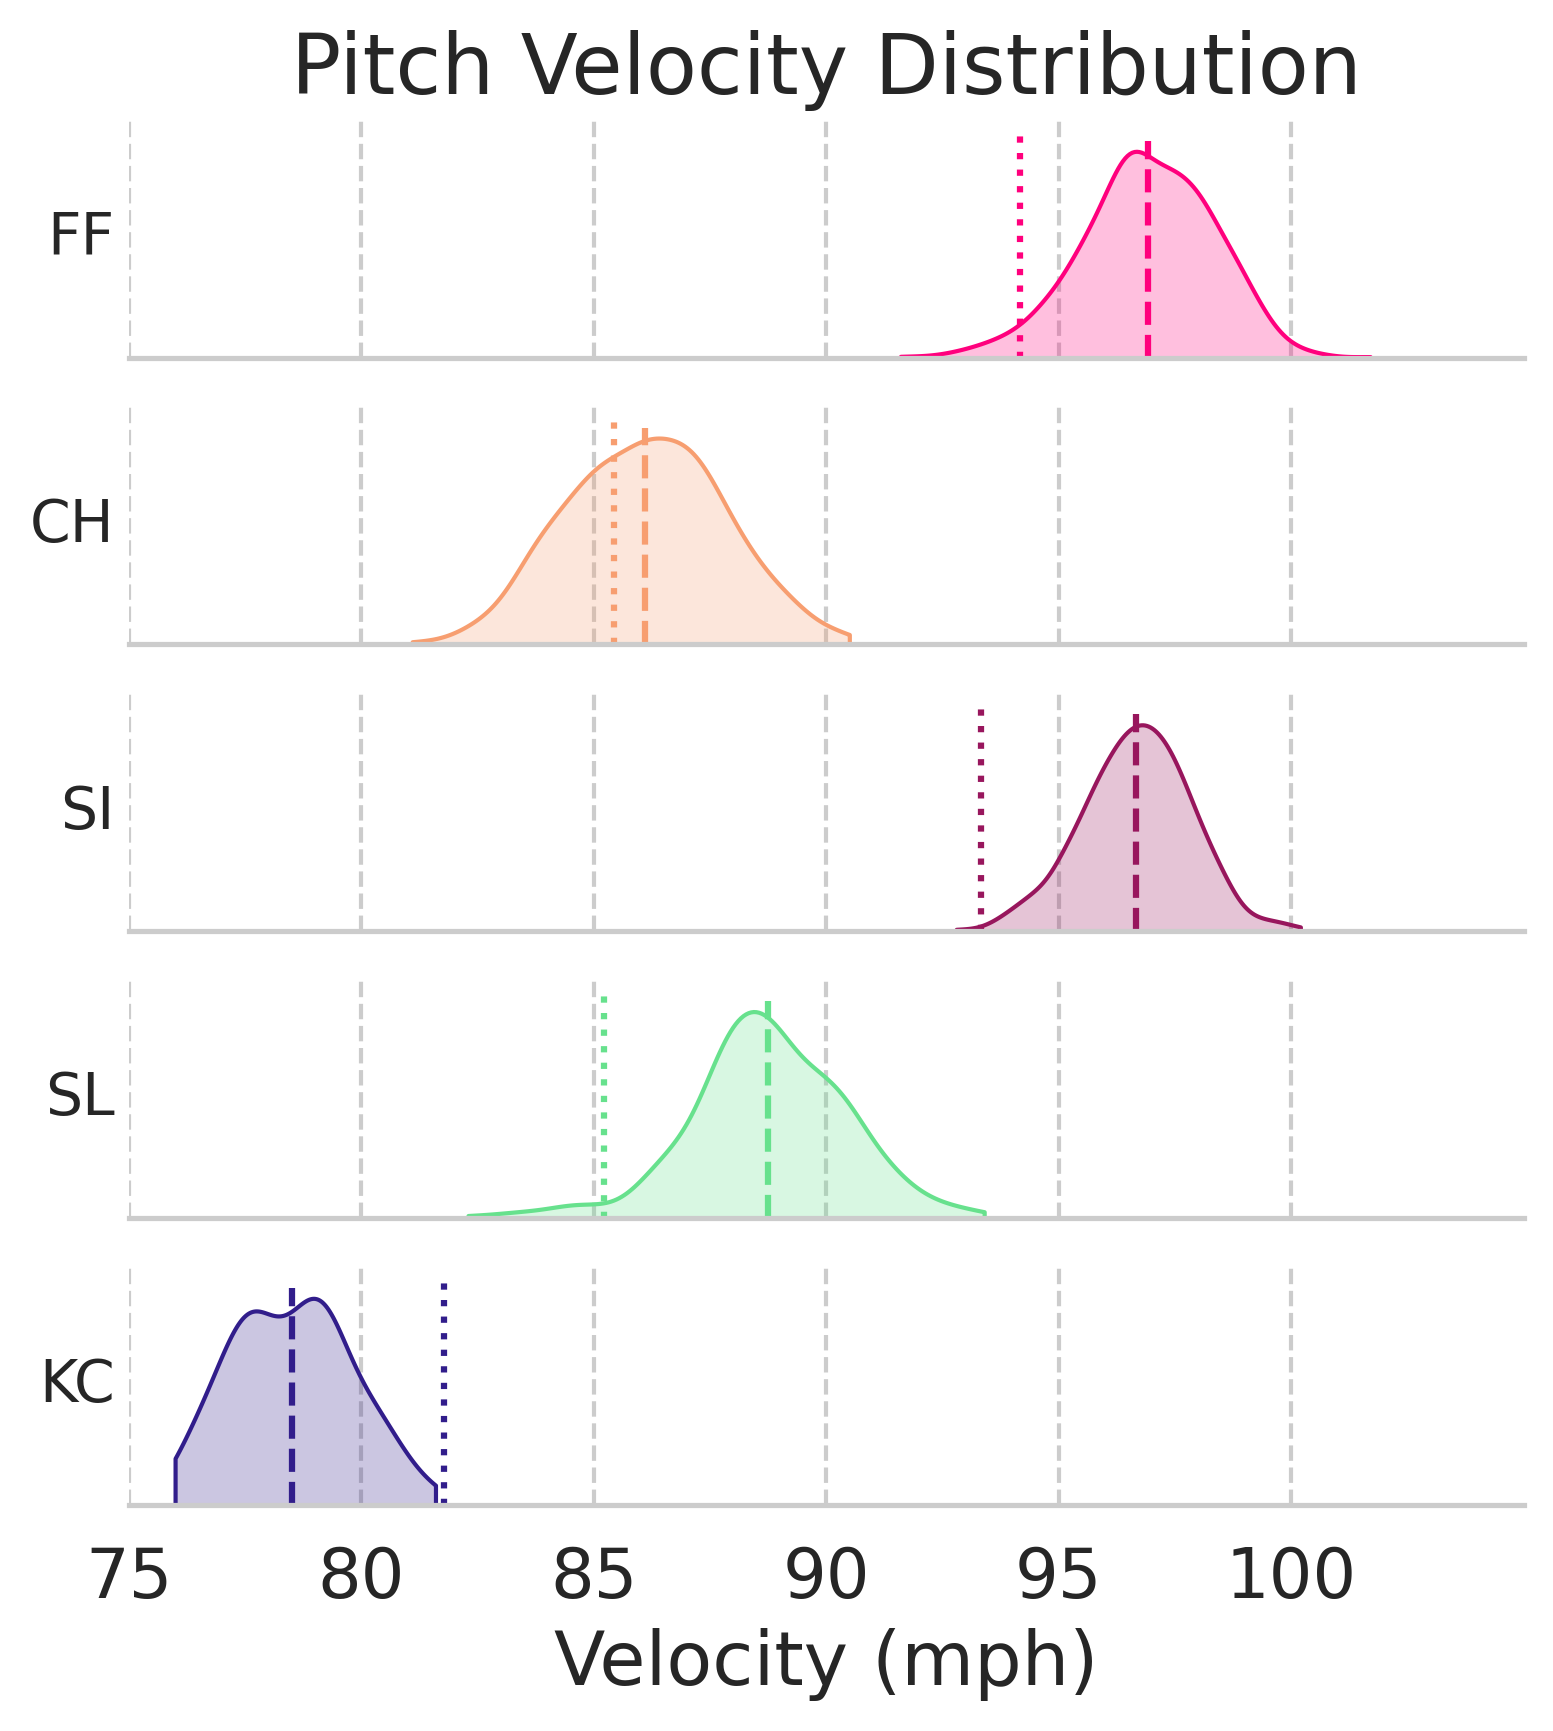

In [31]:
import math
import matplotlib.gridspec as gridspec

def velocity_kdes(df: pd.DataFrame,
                  ax: plt.Axes,
                  gs: gridspec,
                  gs_x: list,
                  gs_y: list,
                  fig: plt.Figure,
                  df_statcast_group: pd.DataFrame):
  # Get the count of each pitch type and sort them in descending order
  sorted_value_counts = df['pitch_type'].value_counts().sort_values(ascending=False)

  # Get the list of pitch types ordered from most to least frequent
  items_in_order = sorted_value_counts.index.tolist()

  # Turn off the axis and set the title for the main plot
  ax.axis('off')
  ax.set_title('Pitch Velocity Distribution', fontdict={'size': 20})

  # Create a grid for the inner subplots
  inner_grid_1 = gridspec.GridSpecFromSubplotSpec(len(items_in_order), 1, subplot_spec=gs[gs_x[0]:gs_x[-1], gs_y[0]:gs_y[-1]])
  ax_top = []

  # Create subplots for each pitch type
  for inner in inner_grid_1:
    ax_top.append(fig.add_subplot(inner))

  ax_number = 0

  # Loop through each pitch type and plot the velocity distribution
  for i in items_in_order:
        # Check if all release speeds for the pitch type are the same
        if np.unique(df[df['pitch_type'] == i]['release_speed']).size == 1:
            # Plot a single line if all values are the same
            ax_top[ax_number].plot([np.unique(df[df['pitch_type'] == i]['release_speed']),
                                    np.unique(df[df['pitch_type'] == i]['release_speed'])], [0, 1], linewidth=4,
                                   color=dict_color[df[df['pitch_type'] == i]['pitch_type'].values[0]], zorder=20)
        else:
            # Plot the KDE for the release speeds
            sns.kdeplot(df[df['pitch_type'] == i]['release_speed'], ax=ax_top[ax_number], fill=True,
                        clip=(df[df['pitch_type'] == i]['release_speed'].min(), df[df['pitch_type'] == i]['release_speed'].max()),
                        color=dict_color[df[df['pitch_type'] == i]['pitch_type'].values[0]])

        # Plot the mean release speed for the current data
        df_average = df[df['pitch_type'] == i]['release_speed']
        ax_top[ax_number].plot([df_average.mean(), df_average.mean()],
                               [ax_top[ax_number].get_ylim()[0], ax_top[ax_number].get_ylim()[1]],
                               color=dict_color[df[df['pitch_type'] == i]['pitch_type'].values[0]],
                               linestyle='--')

        # Plot the mean release speed for the statcast group data
        df_average = df_statcast_group[df_statcast_group['pitch_type'] == i]['release_speed']
        ax_top[ax_number].plot([df_average.mean(), df_average.mean()],
                               [ax_top[ax_number].get_ylim()[0], ax_top[ax_number].get_ylim()[1]],
                               color=dict_color[df[df['pitch_type'] == i]['pitch_type'].values[0]],
                               linestyle=':')

        # Set the x-axis limits
        ax_top[ax_number].set_xlim(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5)
        ax_top[ax_number].set_xlabel('')
        ax_top[ax_number].set_ylabel('')

        # Hide the top, right, and left spines for all but the last subplot
        if ax_number < len(items_in_order) - 1:
            ax_top[ax_number].spines['top'].set_visible(False)
            ax_top[ax_number].spines['right'].set_visible(False)
            ax_top[ax_number].spines['left'].set_visible(False)
            ax_top[ax_number].tick_params(axis='x', colors='none')

        # Set the x-ticks and y-ticks
        ax_top[ax_number].set_xticks(range(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5, 5))
        ax_top[ax_number].set_yticks([])
        ax_top[ax_number].grid(axis='x', linestyle='--')

        # Add text label for the pitch type
        ax_top[ax_number].text(-0.01, 0.5, i, transform=ax_top[ax_number].transAxes,
                               fontsize=14, va='center', ha='right')
        ax_number += 1

  # Hide the top, right, and left spines for the last subplot
  ax_top[-1].spines['top'].set_visible(False)
  ax_top[-1].spines['right'].set_visible(False)
  ax_top[-1].spines['left'].set_visible(False)

  # Set the x-ticks and x-label for the last subplot
  ax_top[-1].set_xticks(list(range(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5, 5)))
  ax_top[-1].set_xlabel('Velocity (mph)')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
velocity_kdes(df=df,
              ax=ax,
              gs=gridspec.GridSpec(1, 1),
              gs_x=[0, 1],
              gs_y=[0, 1],
              fig=fig,
              df_statcast_group=df_statcast_group)

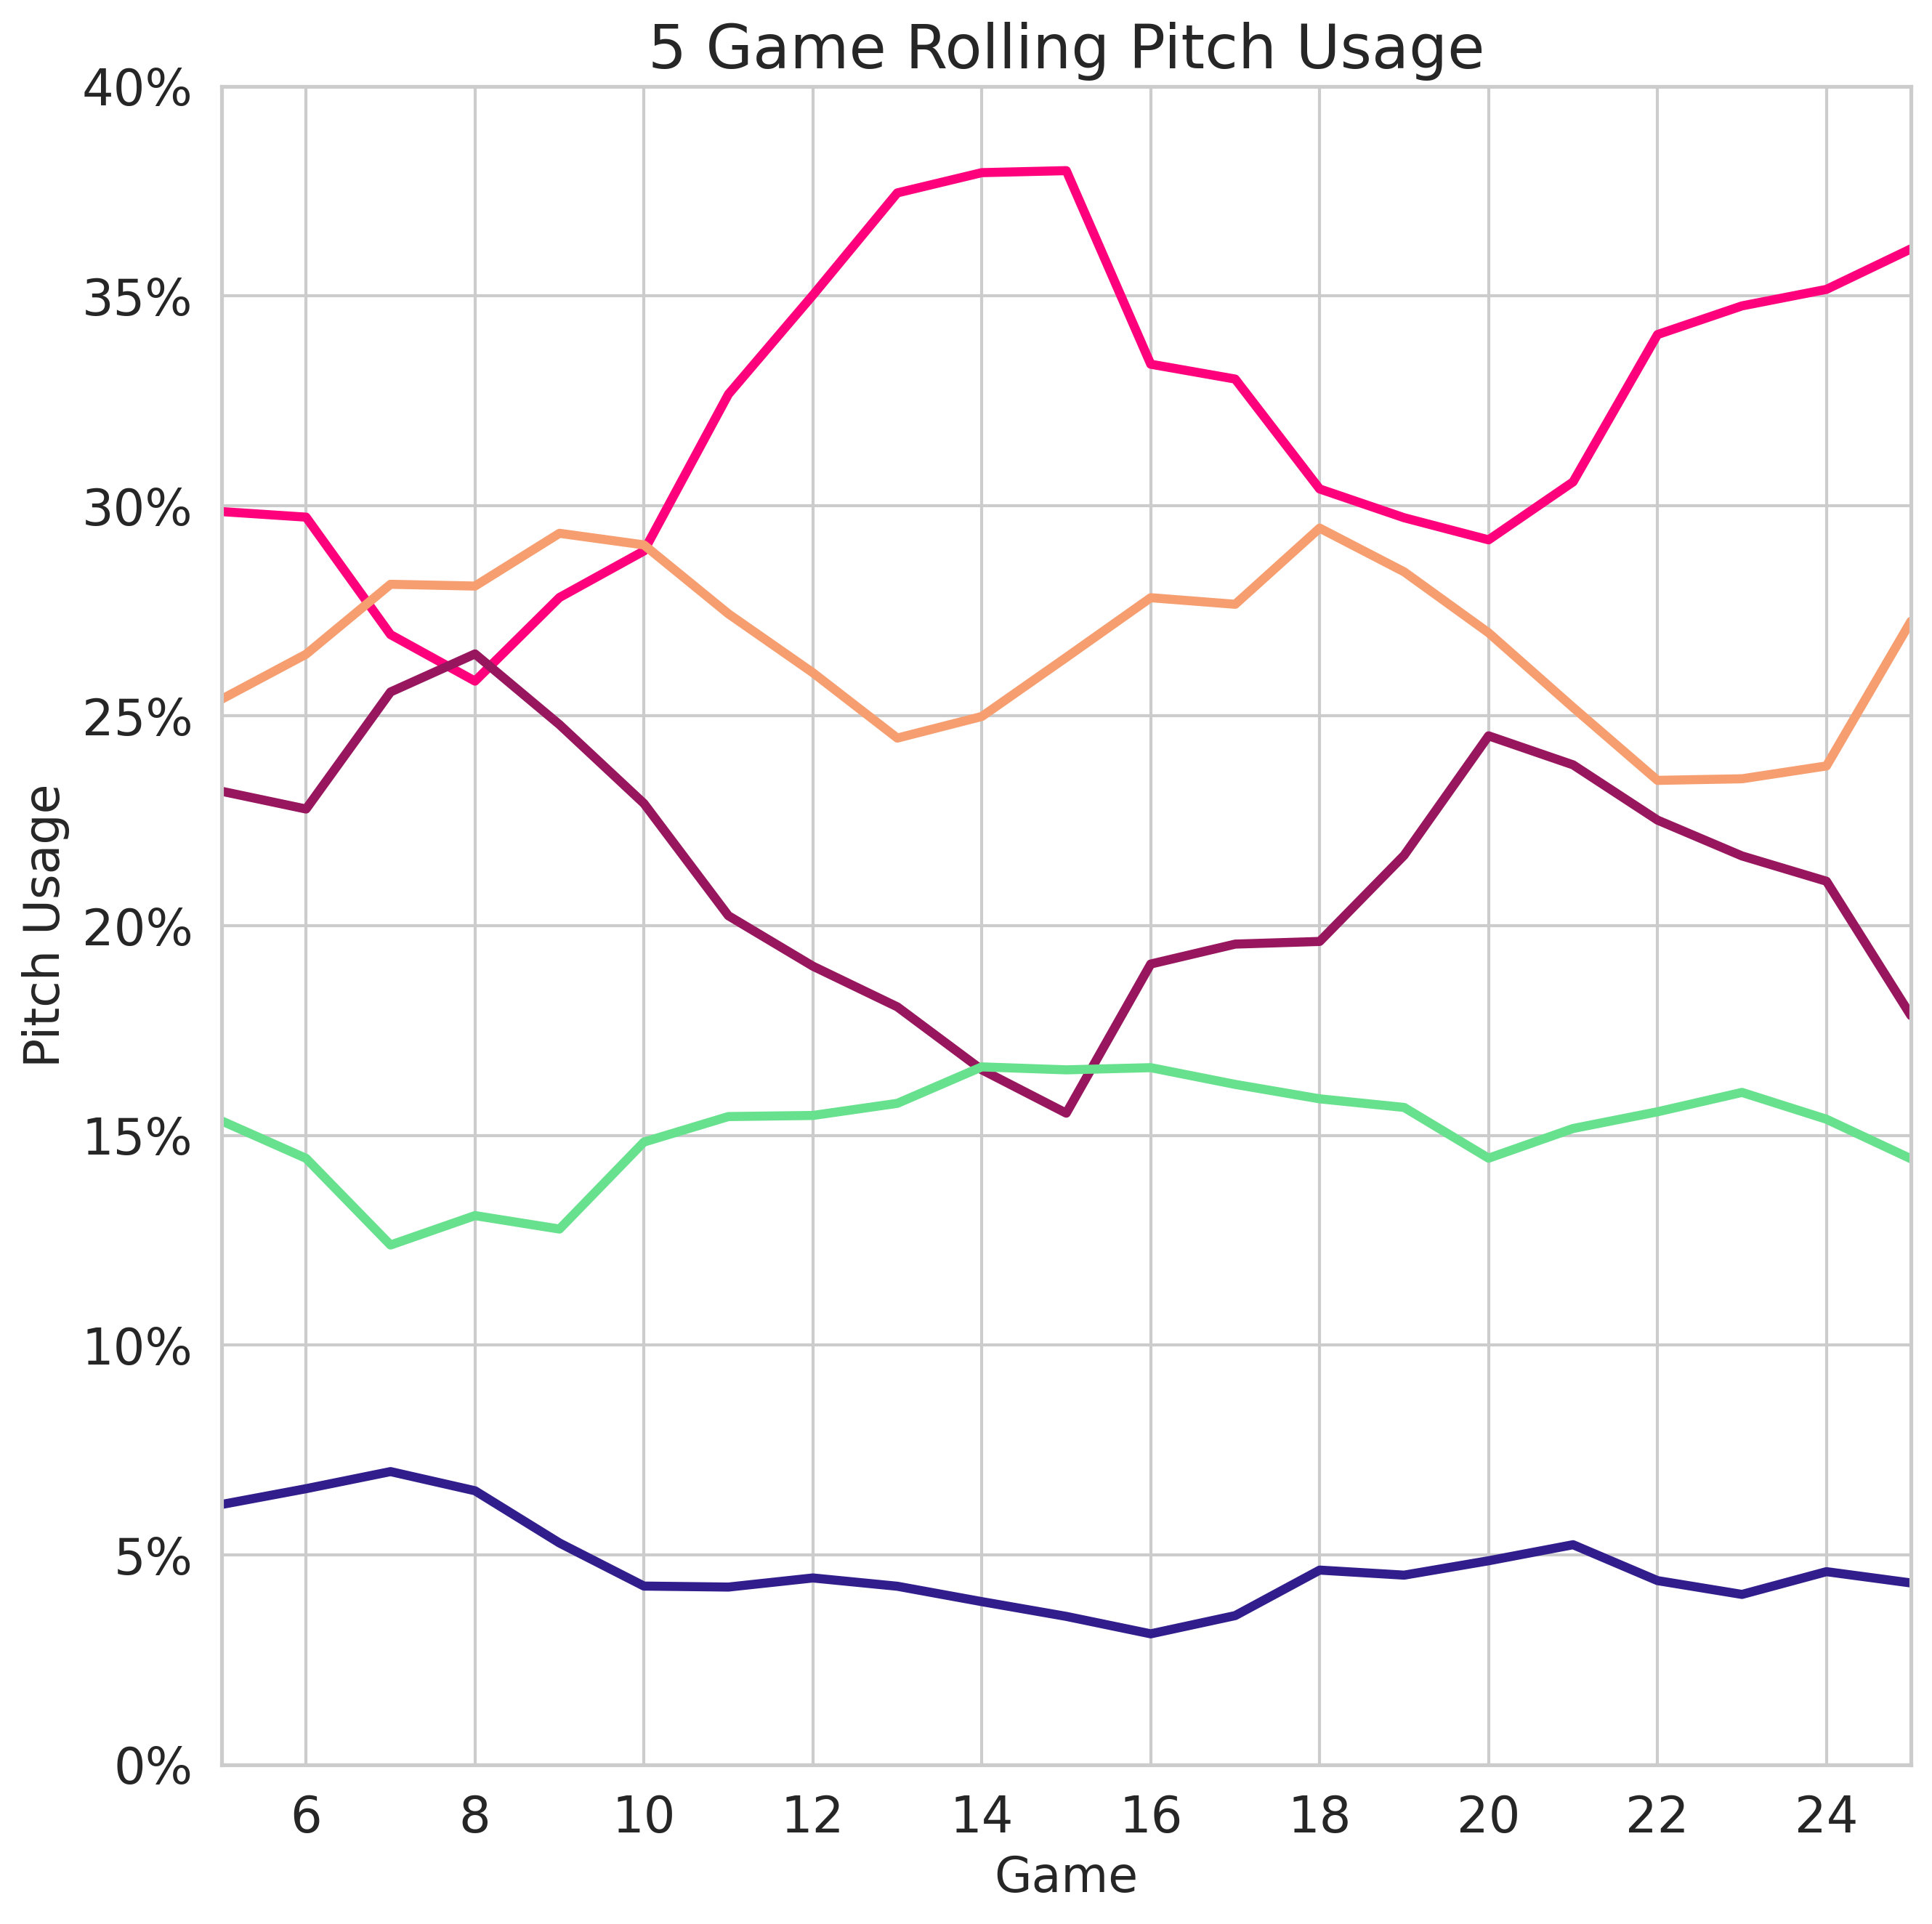

In [40]:
## Rolling Average Usage Plot

from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

def rolling_pitch_usage(df: pd.DataFrame, ax: plt.Axes, window: int):
        # Calculate the proportion of each pitch type per game
        df_game_group = pd.DataFrame((df.groupby(['game_pk', 'game_date', 'pitch_type'])['release_speed'].count() /
                                df.groupby(['game_pk', 'game_date'])['release_speed'].count()).reset_index())

        # Create a complete list of games
        all_games = pd.Series(df_game_group['game_pk'].unique())

        # Create a complete list of pitch types
        all_pitch_types = pd.Series(df_game_group['pitch_type'].unique())

        # Create a DataFrame with all combinations of games and pitch types
        all_combinations = pd.MultiIndex.from_product([all_games, all_pitch_types], names=['game_pk', 'pitch_type']).to_frame(index=False)

        # Merge this DataFrame with your original DataFrame to ensure all combinations are included
        df_complete = pd.merge(all_combinations, df_game_group, on=['game_pk', 'pitch_type'], how='left')

        # Fill missing values with 0
        df_complete['release_speed'] = df_complete['release_speed'].fillna(0)

        # Create mappings for game numbers and game dates
        game_list = df.sort_values(by='game_date')['game_pk'].unique()
        range_list = list(range(1, len(game_list) + 1))
        game_to_range = dict(zip(game_list, range_list))
        game_to_date = df.set_index('game_pk')['game_date'].to_dict()

        # Map game dates and game numbers to the complete DataFrame
        df_complete['game_date'] = df_complete['game_pk'].map(game_to_date)
        df_complete = df_complete.sort_values(by='game_date')
        df_complete['game_number'] = df_complete['game_pk'].map(game_to_range)

        # Plot the rolling pitch usage for each pitch type
        sorted_value_counts = df['pitch_type'].value_counts().sort_values(ascending=False)
        items_in_order = sorted_value_counts.index.tolist()
        max_roll = []

        for i in items_in_order:
                sns.lineplot(x=range(1, max(df_complete[df_complete['pitch_type'] == i]['game_number']) + 1),
                        y=df_complete[df_complete['pitch_type'] == i]['release_speed'].rolling(window).sum() / window,
                        color=dict_color[df[df['pitch_type'] == i]['pitch_type'].values[0]],
                        ax=ax, linewidth=3)
                max_roll.append(np.max(df_complete[df_complete['pitch_type'] == i]['release_speed'].rolling(window).sum() / window))

        # Adjust x-axis limits to start from the window size
        ax.set_xlim(window, len(game_list))
        ax.set_ylim(0, math.ceil(max(max_roll) * 10) / 10)

        # Set axis labels and title
        ax.set_xlabel('Game', fontdict=font_properties_axes)
        ax.set_ylabel('Pitch Usage', fontdict=font_properties_axes)
        ax.set_title(f"{window} Game Rolling Pitch Usage", fontdict=font_properties_titles)

        # Set x-axis to show integer values only
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Set y-axis ticks as percentages
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))


rolling_pitch_usage(df, ax=plt.subplots(figsize=(10, 10))[1], window=5)

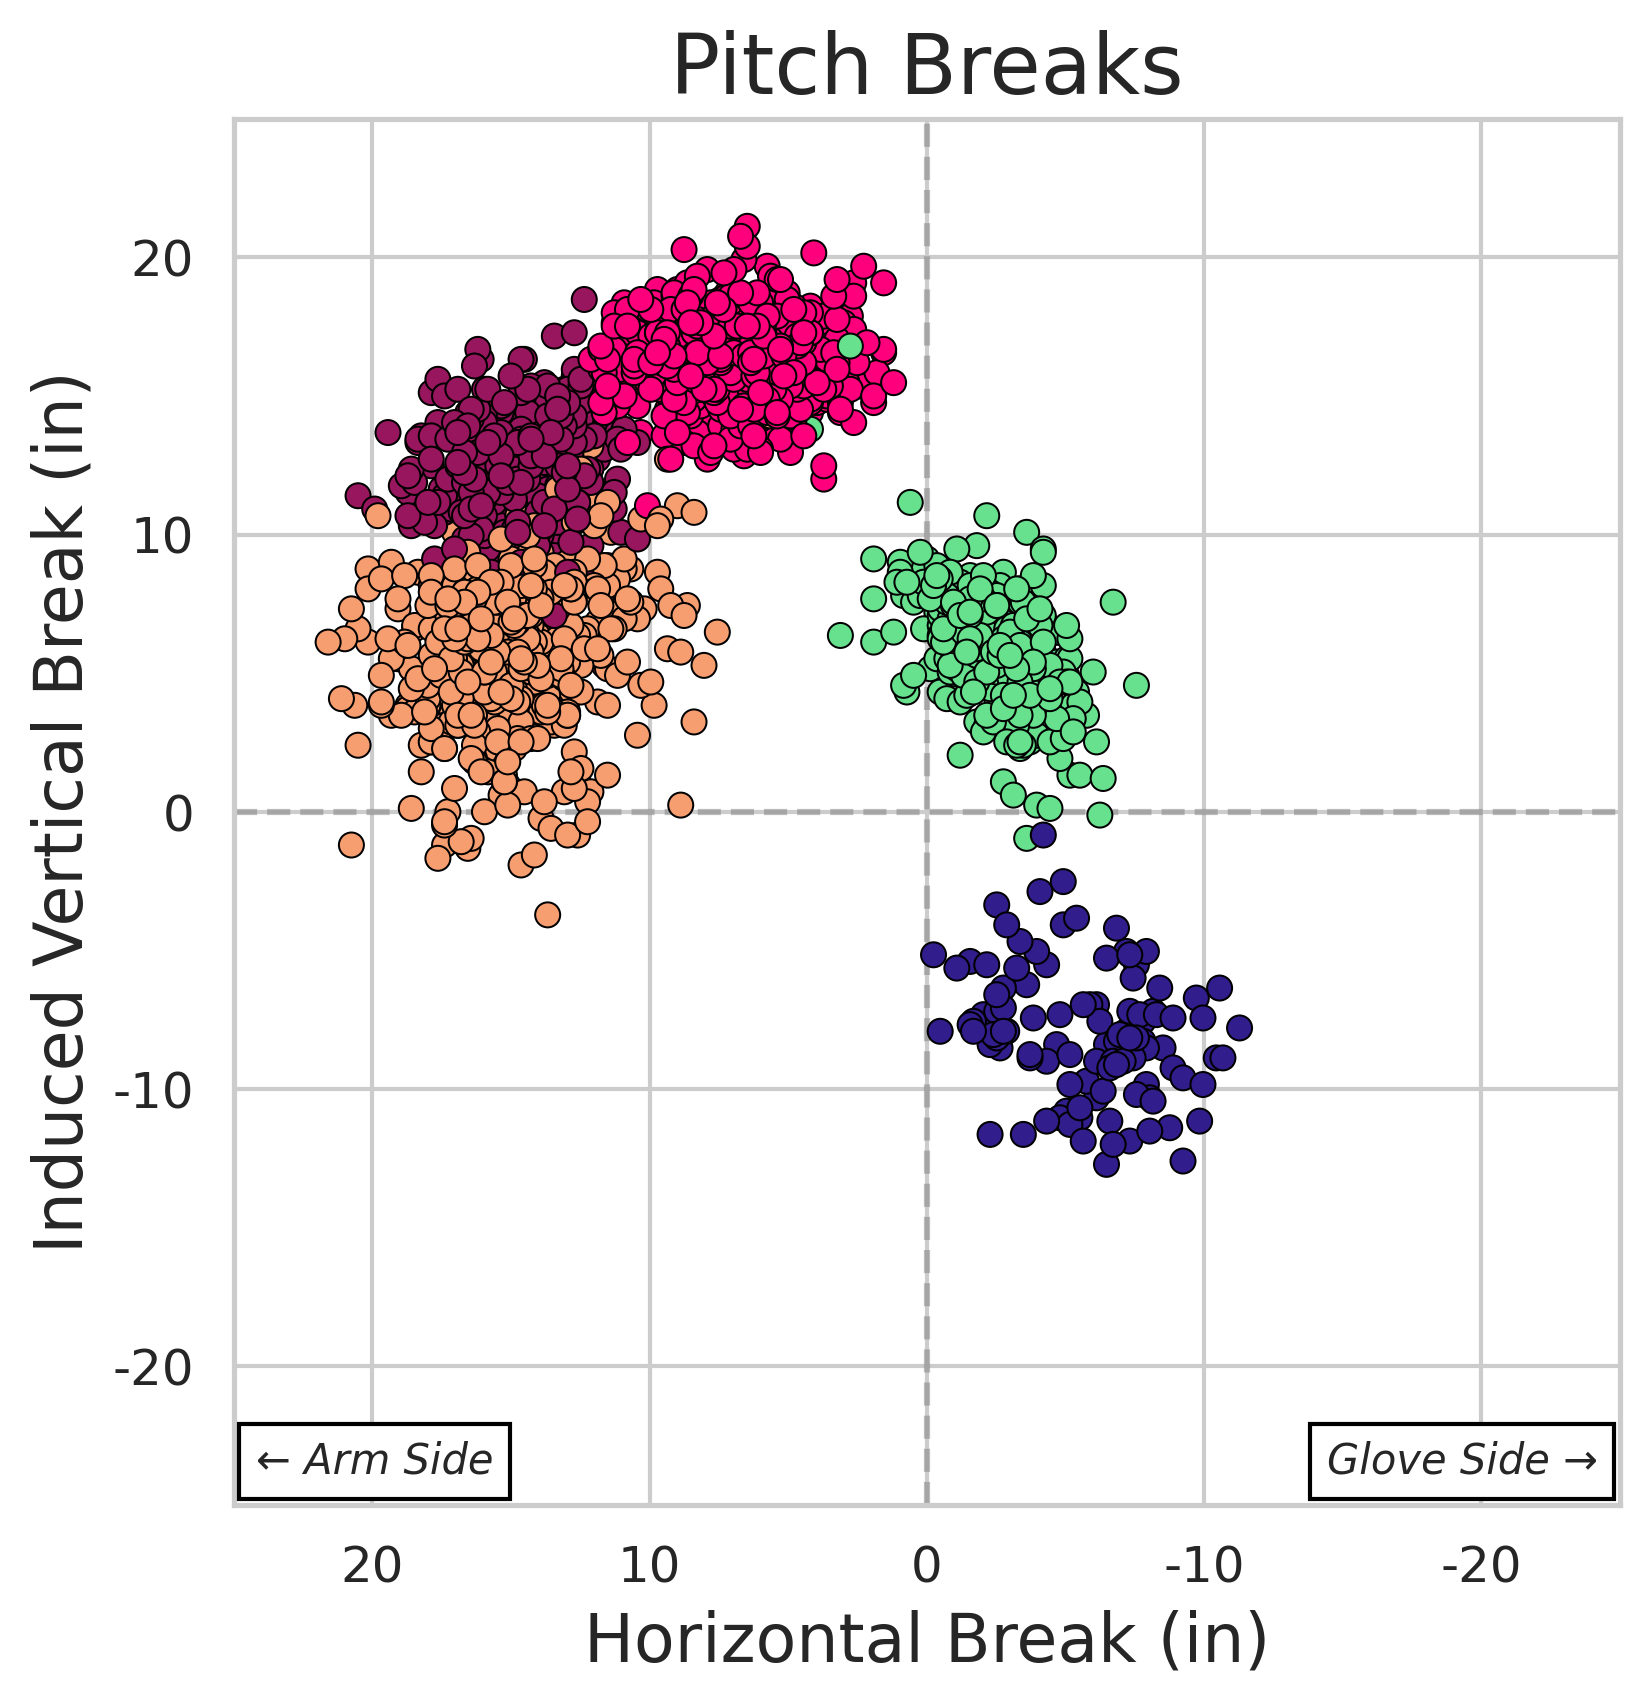

In [44]:
## Short Form Pitch Movement Plot

from matplotlib.ticker import FuncFormatter

def break_plot(df: pd.DataFrame, ax: plt.Axes):
  # Check if the pitcher throws with the right hand
  if df['p_throws'].values[0] == 'R':
    sns.scatterplot(ax=ax,
                        x=df['pfx_x']*-1,
                        y=df['pfx_z'],
                        hue=df['pitch_type'],
                        palette=dict_color,
                        ec='black',
                        alpha=1,
                        zorder=2)

  # Check if the pitcher throws left handed
  if df['p_throws'].values[0] == 'L':
        sns.scatterplot(ax=ax,
                        x=df['pfx_x'],
                        y=df['pfx_z'],
                        hue=df['pitch_type'],
                        palette=dict_color,
                        ec='black',
                        alpha=1,
                        zorder=2)

  # Draw horizontal and vertical lines a y=0 and x=0 respectively
  ax.axhline(y=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)
  ax.axvline(x=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)

  # Set the labels for the x and y axes
  ax.set_xlabel('Horizontal Break (in)', fontdict=font_properties_axes)
  ax.set_ylabel('Induced Vertical Break (in)', fontdict=font_properties_axes)

  # Set the title of the plot
  ax.set_title('Pitch Breaks', fontdict=font_properties_titles)

  # Remove the legend
  ax.get_legend().remove()

  # Set the tick positions and labels for the x and the y axes
  ax.set_xticks(range(-20, 21, 10))
  ax.set_xticklabels(range(-20, 21, 10), fontdict=font_properties)
  ax.set_yticks(range(-20, 21, 10))
  ax.set_yticklabels(range(-20, 21, 10), fontdict=font_properties)

  # Set the limits for the x and y axes
  ax.set_xlim((-25, 25))
  ax.set_ylim((-25, 25))

  # Add text annotations based on the pitcher's throwing hand
  if df['p_throws'].values[0] == 'R':
      ax.text(-24.2, -24.2, s='← Glove Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
      ax.text(24.2, -24.2, s='Arm Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)

  if df['p_throws'].values[0] == 'L':
      ax.invert_xaxis()
      ax.text(24.2, -24.2, s='← Arm Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
      ax.text(-24.2, -24.2, s='Glove Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)

  # Set the aspect ratio of the plot to be equal
  ax.set_aspect('equal', adjustable='box')

  # Format the x and y axis tick labels as integers
  ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


break_plot(df=df,ax=plt.subplots(figsize=(6, 6))[1])

## Tables

In [45]:
## Season Pitching Summary

def fangraphs_pitching_leaderboards(season:int):
    url = f"https://www.fangraphs.com/api/leaders/major-league/data?age=&pos=all&stats=pit&lg=all&season={season}&season1={season}&ind=0&qual=0&type=8&month=0&pageitems=500000"
    data = requests.get(url).json()
    df = pd.DataFrame(data=data['data'])
    return df

df_fangraphs = fangraphs_pitching_leaderboards(season = 2024)
df_fangraphs.head()

Throws  xMLBAMID                                               Name  \
0      L    519242  <a href="statss.aspx?playerid=10603&position=P...   
1      L    669373  <a href="statss.aspx?playerid=22267&position=P...   
2      R    657277  <a href="statss.aspx?playerid=17995&position=P...   
3      L    650911  <a href="statss.aspx?playerid=20778&position=P...   
4      L    666142  <a href="statss.aspx?playerid=21846&position=P...   

                                                Team  Season   Age     AgeR  \
0  <a href="leaders.aspx?pos=all&stats=pit&lg=all...    2024  35.0  35 - 35   
1  <a href="leaders.aspx?pos=all&stats=pit&lg=all...    2024  27.0  27 - 27   
2  <a href="leaders.aspx?pos=all&stats=pit&lg=all...    2024  27.0  27 - 27   
3  <a href="leaders.aspx?pos=all&stats=pit&lg=all...    2024  27.0  27 - 27   
4  <a href="leaders.aspx?pos=all&stats=pit&lg=all...    2024  26.0  26 - 26   

   SeasonMin  SeasonMax     W  ...        Q     TG         TIP  \
0       2024       2024  14.0  ...  1.10761  127.0  140.666656   
1       2024       2024  14.0  ...  1.21354  128.0  155.333328   
2       2024       2024  11.0  ...  1.33850  129.0  172.666656   
3       2024       2024   9.0  ...  1.15223  127.0  146.333328   
4       2024       2024  10.0  ...  1.19948  127.0  152.333328   

      PlayerNameRoute          PlayerName  position  TeamName  TeamNameAbb  \
0          Chris Sale          Chris Sale         P       ATL          ATL   
1        Tarik Skubal        Tarik Skubal         P       DET          DET   
2          Logan Webb          Logan Webb         P       SFG          SFG   
3  Cristopher Sanchez  Cristopher Sánchez         P       PHI          PHI   
4         Cole Ragans         Cole Ragans         P       KCR          KCR   

   teamid  playerid  
0      16     10603  
1       6     22267  
2      30     17995  
3      26     20778  
4       7     21846  

[5 rows x 432 columns]

In [46]:
### FANGRAPHS STATS DICT ###
fangraphs_stats_dict = {'IP':{'table_header':'$\\bf{IP}$','format':'.1f',} ,
 'TBF':{'table_header':'$\\bf{PA}$','format':'.0f',} ,
 'AVG':{'table_header':'$\\bf{AVG}$','format':'.3f',} ,
 'K/9':{'table_header':'$\\bf{K\/9}$','format':'.2f',} ,
 'BB/9':{'table_header':'$\\bf{BB\/9}$','format':'.2f',} ,
 'K/BB':{'table_header':'$\\bf{K\/BB}$','format':'.2f',} ,
 'HR/9':{'table_header':'$\\bf{HR\/9}$','format':'.2f',} ,
 'K%':{'table_header':'$\\bf{K\%}$','format':'.1%',} ,
 'BB%':{'table_header':'$\\bf{BB\%}$','format':'.1%',} ,
 'K-BB%':{'table_header':'$\\bf{K-BB\%}$','format':'.1%',} ,
 'WHIP':{'table_header':'$\\bf{WHIP}$','format':'.2f',} ,
 'BABIP':{'table_header':'$\\bf{BABIP}$','format':'.3f',} ,
 'LOB%':{'table_header':'$\\bf{LOB\%}$','format':'.1%',} ,
 'xFIP':{'table_header':'$\\bf{xFIP}$','format':'.2f',} ,
 'FIP':{'table_header':'$\\bf{FIP}$','format':'.2f',} ,
 'H':{'table_header':'$\\bf{H}$','format':'.0f',} ,
 '2B':{'table_header':'$\\bf{2B}$','format':'.0f',} ,
 '3B':{'table_header':'$\\bf{3B}$','format':'.0f',} ,
 'R':{'table_header':'$\\bf{R}$','format':'.0f',} ,
 'ER':{'table_header':'$\\bf{ER}$','format':'.0f',} ,
 'HR':{'table_header':'$\\bf{HR}$','format':'.0f',} ,
 'BB':{'table_header':'$\\bf{BB}$','format':'.0f',} ,
 'IBB':{'table_header':'$\\bf{IBB}$','format':'.0f',} ,
 'HBP':{'table_header':'$\\bf{HBP}$','format':'.0f',} ,
 'SO':{'table_header':'$\\bf{SO}$','format':'.0f',} ,
 'OBP':{'table_header':'$\\bf{OBP}$','format':'.0f',} ,
 'SLG':{'table_header':'$\\bf{SLG}$','format':'.0f',} ,
 'ERA':{'table_header':'$\\bf{ERA}$','format':'.2f',} ,
 'wOBA':{'table_header':'$\\bf{wOBA}$','format':'.3f',} ,
 'G':{'table_header':'$\\bf{G}$','format':'.0f',} }

<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '155.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_pitcher.loc[0] = [format(df_fangraphs_pitcher[x][0],fangraphs_stats_dict[x]['format']) if df_fangraphs_pitcher[x][0] != '---' else '---' for x in df_fangraphs_pitcher]
<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '614' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_pitcher.loc[0] = [format(df_fangraphs_pitcher[x][0],fangraphs_stats_dict[x]['format']) if df_fangraphs_pitcher[x][0] != '---' else '---' for x in df_fangraphs_pitcher]
<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of 

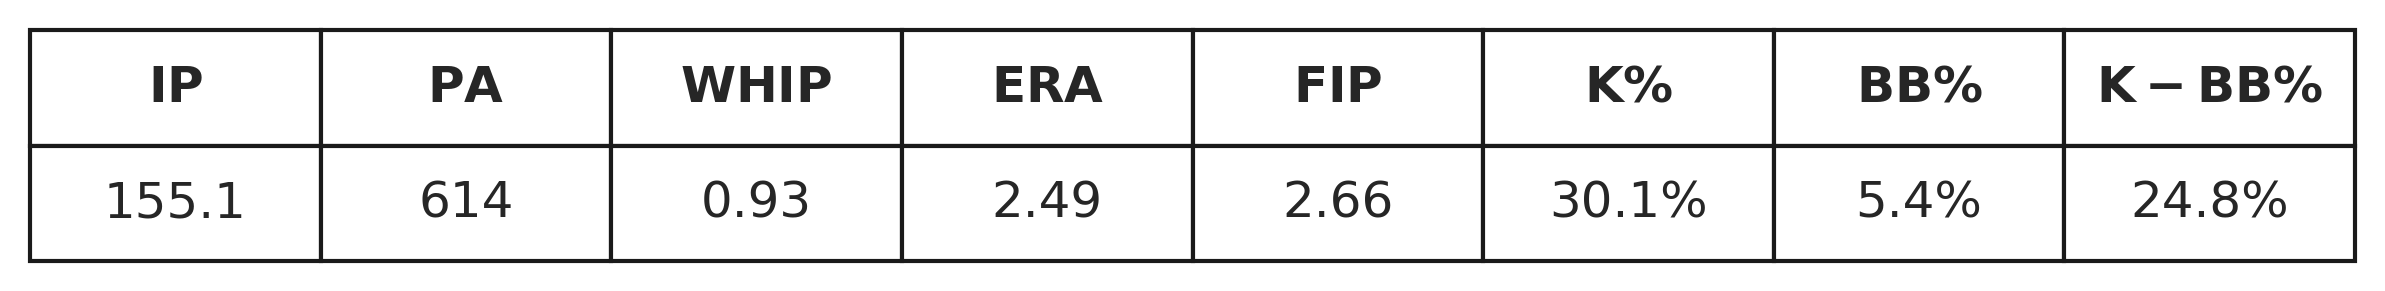

In [47]:
def fangraphs_pitcher_stats(pitcher_id: int, ax: plt.Axes,stats:list, season:int,fontsize:int=20):
    df_fangraphs = fangraphs_pitching_leaderboards(season = season)

    df_fangraphs_pitcher = df_fangraphs[df_fangraphs['xMLBAMID'] == pitcher_id][stats].reset_index(drop=True)

    df_fangraphs_pitcher.loc[0] = [format(df_fangraphs_pitcher[x][0],fangraphs_stats_dict[x]['format']) if df_fangraphs_pitcher[x][0] != '---' else '---' for x in df_fangraphs_pitcher]
    table_fg = ax.table(cellText=df_fangraphs_pitcher.values, colLabels=stats, cellLoc='center',
                    bbox=[0.00, 0.0, 1, 1])

    table_fg.set_fontsize(fontsize)


    new_column_names = [fangraphs_stats_dict[x]['table_header'] if x in df_fangraphs_pitcher else '---' for x in stats]
    # #new_column_names = ['Pitch Name', 'Pitch%', 'Velocity', 'Spin Rate','Exit Velocity', 'Whiff%', 'CSW%']
    for i, col_name in enumerate(new_column_names):
        table_fg.get_celld()[(0, i)].get_text().set_text(col_name)

    ax.axis('off')

stats = ['IP','TBF','WHIP','ERA', 'FIP', 'K%', 'BB%', 'K-BB%']
fangraphs_pitcher_stats(pitcher_id = pitcher_id,
                        ax = plt.subplots(figsize=(10, 1))[1],
                        stats = stats,
                        season = 2024)

In [55]:
## PITCH METRIC SUMMARY

def df_grouping(df: pd.DataFrame):
    # Group the DataFrame by pitch type and aggregate various statistics
    df_group = df.groupby(['pitch_type']).agg(
                        pitch = ('pitch_type','count'),  # Count of pitches
                        release_speed = ('release_speed','mean'),  # Average release speed
                        pfx_z = ('pfx_z','mean'),  # Average vertical movement
                        pfx_x = ('pfx_x','mean'),  # Average horizontal movement
                        release_spin_rate = ('release_spin_rate','mean'),  # Average spin rate
                        release_pos_x = ('release_pos_x','mean'),  # Average horizontal release position
                        release_pos_z = ('release_pos_z','mean'),  # Average vertical release position
                        release_extension = ('release_extension','mean'),  # Average release extension
                        delta_run_exp = ('delta_run_exp','sum'),  # Total change in run expectancy
                        swing = ('swing','sum'),  # Total swings
                        whiff = ('whiff','sum'),  # Total whiffs
                        in_zone = ('in_zone','sum'),  # Total in-zone pitches
                        out_zone = ('out_zone','sum'),  # Total out-of-zone pitches
                        chase = ('chase','sum'),  # Total chases
                        xwoba = ('estimated_woba_using_speedangle','mean'),  # Average expected wOBA
                    ).reset_index()

    # Map pitch types to their descriptions
    df_group['pitch_description'] = df_group['pitch_type'].map(dict_pitch)

    # Calculate pitch usage as a percentage of total pitches
    df_group['pitch_usage'] = df_group['pitch'] / df_group['pitch'].sum()

    # Calculate whiff rate as the ratio of whiffs to swings
    df_group['whiff_rate'] = df_group['whiff'] / df_group['swing']

    # Calculate in-zone rate as the ratio of in-zone pitches to total pitches
    df_group['in_zone_rate'] = df_group['in_zone'] / df_group['pitch']

    # Calculate chase rate as the ratio of chases to out-of-zone pitches
    df_group['chase_rate'] = df_group['chase'] / df_group['out_zone']

    # Calculate delta run expectancy per 100 pitches
    df_group['delta_run_exp_per_100'] = -df_group['delta_run_exp'] / df_group['pitch'] * 100

    # Map pitch types to their colours
    df_group['colour'] = df_group['pitch_type'].map(dict_color)

    # Sort the DataFrame by pitch usage in descending order
    df_group = df_group.sort_values(by='pitch_usage', ascending=False)
    colour_list = df_group['colour'].tolist()

    plot_table_all = pd.DataFrame(data={
                'pitch_type': 'All',
                'pitch_description': 'All',  # Description for the summary row
                'pitch': df['pitch_type'].count(),  # Total count of pitches
                'pitch_usage': 1,  # Usage percentage for all pitches (100%)
                'release_speed': np.nan,  # Placeholder for release speed
                'pfx_z': np.nan,  # Placeholder for vertical movement
                'pfx_x': np.nan,  # Placeholder for horizontal movement
                'release_spin_rate': np.nan,  # Placeholder for spin rate
                'release_pos_x': np.nan,  # Placeholder for horizontal release position
                'release_pos_z': np.nan,  # Placeholder for vertical release position
                'release_extension': df['release_extension'].mean(),  # Placeholder for release extension
                'delta_run_exp_per_100': df['delta_run_exp'].sum() / df['pitch_type'].count() * -100,  # Delta run expectancy per 100 pitches
                'whiff_rate': df['whiff'].sum() / df['swing'].sum(),  # Whiff rate
                'in_zone_rate': df['in_zone'].sum() / df['pitch_type'].count(),  # In-zone rate
                'chase_rate': df['chase'].sum() / df['out_zone'].sum(),  # Chase rate
                'xwoba': df['estimated_woba_using_speedangle'].mean()  # Average expected wOBA
            }, index=[0])

    # Concatenate the group DataFrame with the summary row DataFrame
    df_plot = pd.concat([df_group, plot_table_all], ignore_index=True)


    return df_plot, colour_list

In [56]:
pitch_stats_dict = {
    'pitch': {'table_header': '$\\bf{Count}$', 'format': '.0f'},
    'release_speed': {'table_header': '$\\bf{Velocity}$', 'format': '.1f'},
    'pfx_z': {'table_header': '$\\bf{iVB}$', 'format': '.1f'},
    'pfx_x': {'table_header': '$\\bf{HB}$', 'format': '.1f'},
    'release_spin_rate': {'table_header': '$\\bf{Spin}$', 'format': '.0f'},
    'release_pos_x': {'table_header': '$\\bf{hRel}$', 'format': '.1f'},
    'release_pos_z': {'table_header': '$\\bf{vRel}$', 'format': '.1f'},
    'release_extension': {'table_header': '$\\bf{Ext.}$', 'format': '.1f'},
    'xwoba': {'table_header': '$\\bf{xwOBA}$', 'format': '.3f'},
    'pitch_usage': {'table_header': '$\\bf{Pitch\%}$', 'format': '.1%'},
    'whiff_rate': {'table_header': '$\\bf{Whiff\%}$', 'format': '.1%'},
    'in_zone_rate': {'table_header': '$\\bf{Zone\%}$', 'format': '.1%'},
    'chase_rate': {'table_header': '$\\bf{Chase\%}$', 'format': '.1%'},
    'delta_run_exp_per_100': {'table_header': '$\\bf{RV\//100}$', 'format': '.1f'}
    }

table_columns = [ 'pitch_description',
            'pitch',
            'pitch_usage',
            'release_speed',
            'pfx_z',
            'pfx_x',
            'release_spin_rate',
            'release_pos_x',
            'release_pos_z',
            'release_extension',
            'delta_run_exp_per_100',
            'whiff_rate',
            'in_zone_rate',
            'chase_rate',
            'xwoba',
            ]

In [57]:
def plot_pitch_format(df: pd.DataFrame):
    # Create a DataFrame for the summary row with aggregated statistics for all pitches
    df_group = df[table_columns].fillna('—')

    # Apply the formats to the DataFrame
    # Iterate over each column in pitch_stats_dict
    for column, props in pitch_stats_dict.items():
        # Check if the column exists in df_plot
        if column in df_group.columns:
            # Apply the specified format to the column values
            df_group[column] = df_group[column].apply(lambda x: format(x, props['format']) if isinstance(x, (int, float)) else x)
    return df_group

In [58]:
import matplotlib
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Define color maps
cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF','#FFFFFF','#FFB000'])
cmap_sum_r = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#FFB000','#FFFFFF','#648FFF'])

# List of statistics to color
colour_stats = ['release_speed', 'release_extension', 'delta_run_exp_per_100', 'whiff_rate', 'in_zone_rate', 'chase_rate', 'xwoba']

### GET COLOURS ###
def get_color(value, normalize, cmap_sum):
    color = cmap_sum(normalize(value))
    return mcolors.to_hex(color)

def get_cell_colouts(df_group: pd.DataFrame,
                     df_statcast_group: pd.DataFrame,
                     colour_stats: list,
                     cmap_sum: matplotlib.colors.LinearSegmentedColormap,
                     cmap_sum_r: matplotlib.colors.LinearSegmentedColormap):
    colour_list_df = []
    for pt in df_group.pitch_type.unique():
        colour_list_df_inner = []
        select_df = df_statcast_group[df_statcast_group['pitch_type'] == pt]
        df_group_select = df_group[df_group['pitch_type'] == pt]

        for tb in table_columns:

            if tb in colour_stats and type(df_group_select[tb].values[0]) == np.float64:
                if np.isnan(df_group_select[tb].values[0]):
                    colour_list_df_inner.append('#ffffff')
                elif tb == 'release_speed':
                    normalize = mcolors.Normalize(vmin=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 0.95,
                                                  vmax=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 1.05)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum))
                elif tb == 'delta_run_exp_per_100':
                    normalize = mcolors.Normalize(vmin=-1.5, vmax=1.5)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum))
                elif tb == 'xwoba':
                    normalize = mcolors.Normalize(vmin=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 0.7,
                                                  vmax=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 1.3)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum_r))
                else:
                    normalize = mcolors.Normalize(vmin=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 0.7,
                                                  vmax=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 1.3)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum))
            else:
                colour_list_df_inner.append('#ffffff')
        colour_list_df.append(colour_list_df_inner)
    return colour_list_df

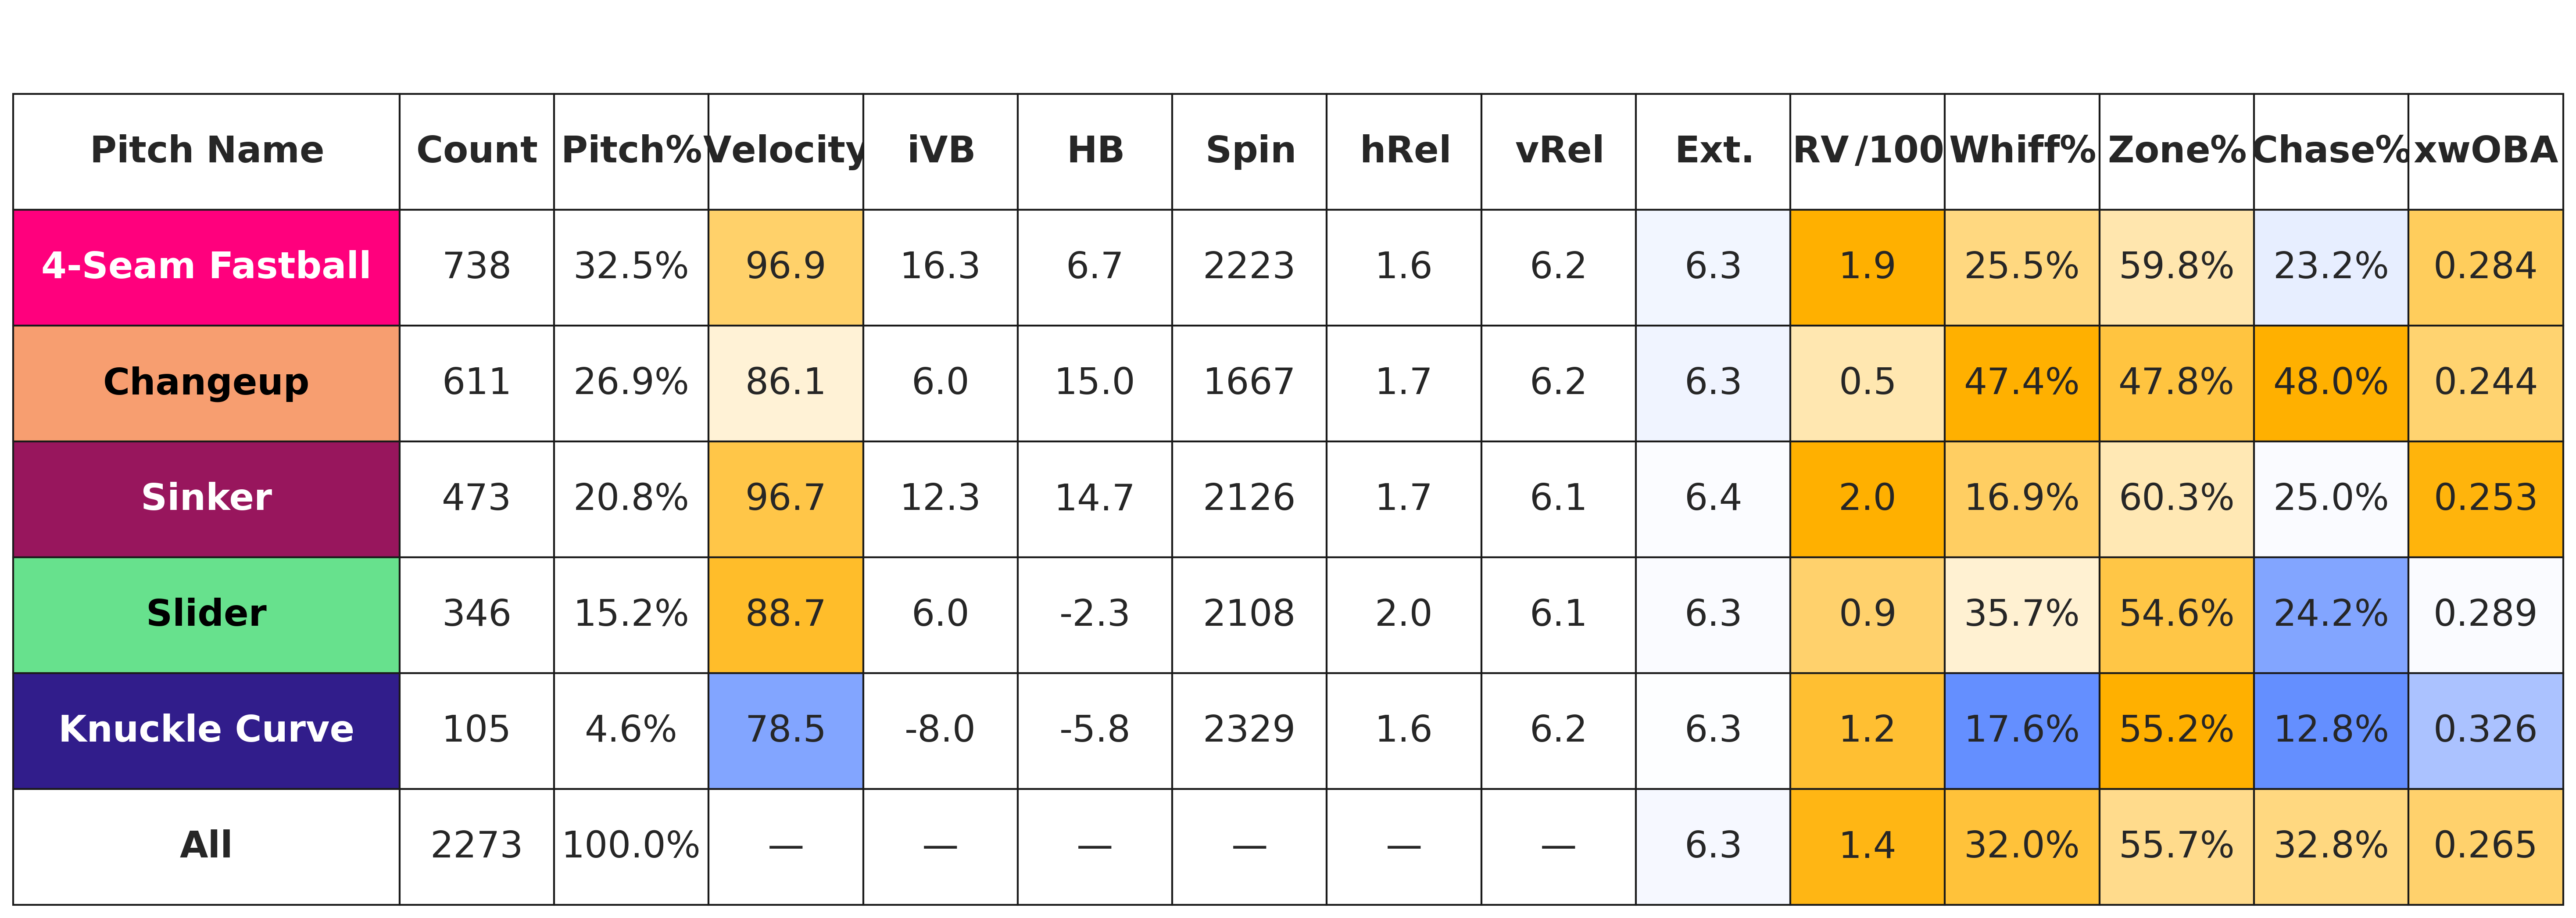

In [60]:
def pitch_table(df: pd.DataFrame, ax: plt.Axes,fontsize:int=20):
    df_group, color_list = df_grouping(df)
    color_list_df = get_cell_colouts(df_group, df_statcast_group, colour_stats, cmap_sum, cmap_sum_r)
    df_plot = plot_pitch_format(df_group)

    # Create a table plot with the DataFrame values and specified column labels
    table_plot = ax.table(cellText=df_plot.values, colLabels=table_columns, cellLoc='center',
                        bbox=[0, -0.1, 1, 1],
                        colWidths=[2.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        cellColours=color_list_df)

    # Disable automatic font size adjustment and set the font size
    table_plot.auto_set_font_size(False)

    table_plot.set_fontsize(fontsize)

    # Scale the table plot
    table_plot.scale(1, 0.5)

    # Correctly format the new column names using LaTeX formatting
    new_column_names = ['$\\bf{Pitch\\ Name}$'] + [pitch_stats_dict[x]['table_header'] if x in pitch_stats_dict else '---' for x in table_columns[1:]]

    # Update the table headers with the new column names
    for i, col_name in enumerate(new_column_names):
        table_plot.get_celld()[(0, i)].get_text().set_text(col_name)

    # Bold the first column in the table
    for i in range(len(df_plot)):
        table_plot.get_celld()[(i+1, 0)].get_text().set_fontweight('bold')

    # Set the color for the first column, all rows except header and last
    for i in range(1, len(df_plot)):
        # Check if the pitch type is in the specified list
        if table_plot.get_celld()[(i, 0)].get_text().get_text() in ['Split-Finger', 'Slider', 'Changeup']:
            table_plot.get_celld()[(i, 0)].set_text_props(color='#000000', fontweight='bold')
        else:
            table_plot.get_celld()[(i, 0)].set_text_props(color='#FFFFFF')
        # Set the background color of the cell
        table_plot.get_celld()[(i, 0)].set_facecolor(color_list[i-1])

    # Remove the axis
    ax.axis('off')

pitch_table(df = df, ax = plt.subplots(figsize=(25, 8))[1])

### Generate the Pitching Summary

Gathering Player Data


<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '155.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_pitcher.loc[0] = [format(df_fangraphs_pitcher[x][0],fangraphs_stats_dict[x]['format']) if df_fangraphs_pitcher[x][0] != '---' else '---' for x in df_fangraphs_pitcher]
<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '614' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_pitcher.loc[0] = [format(df_fangraphs_pitcher[x][0],fangraphs_stats_dict[x]['format']) if df_fangraphs_pitcher[x][0] != '---' else '---' for x in df_fangraphs_pitcher]
<ipython-input-47-219263f017db>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of 

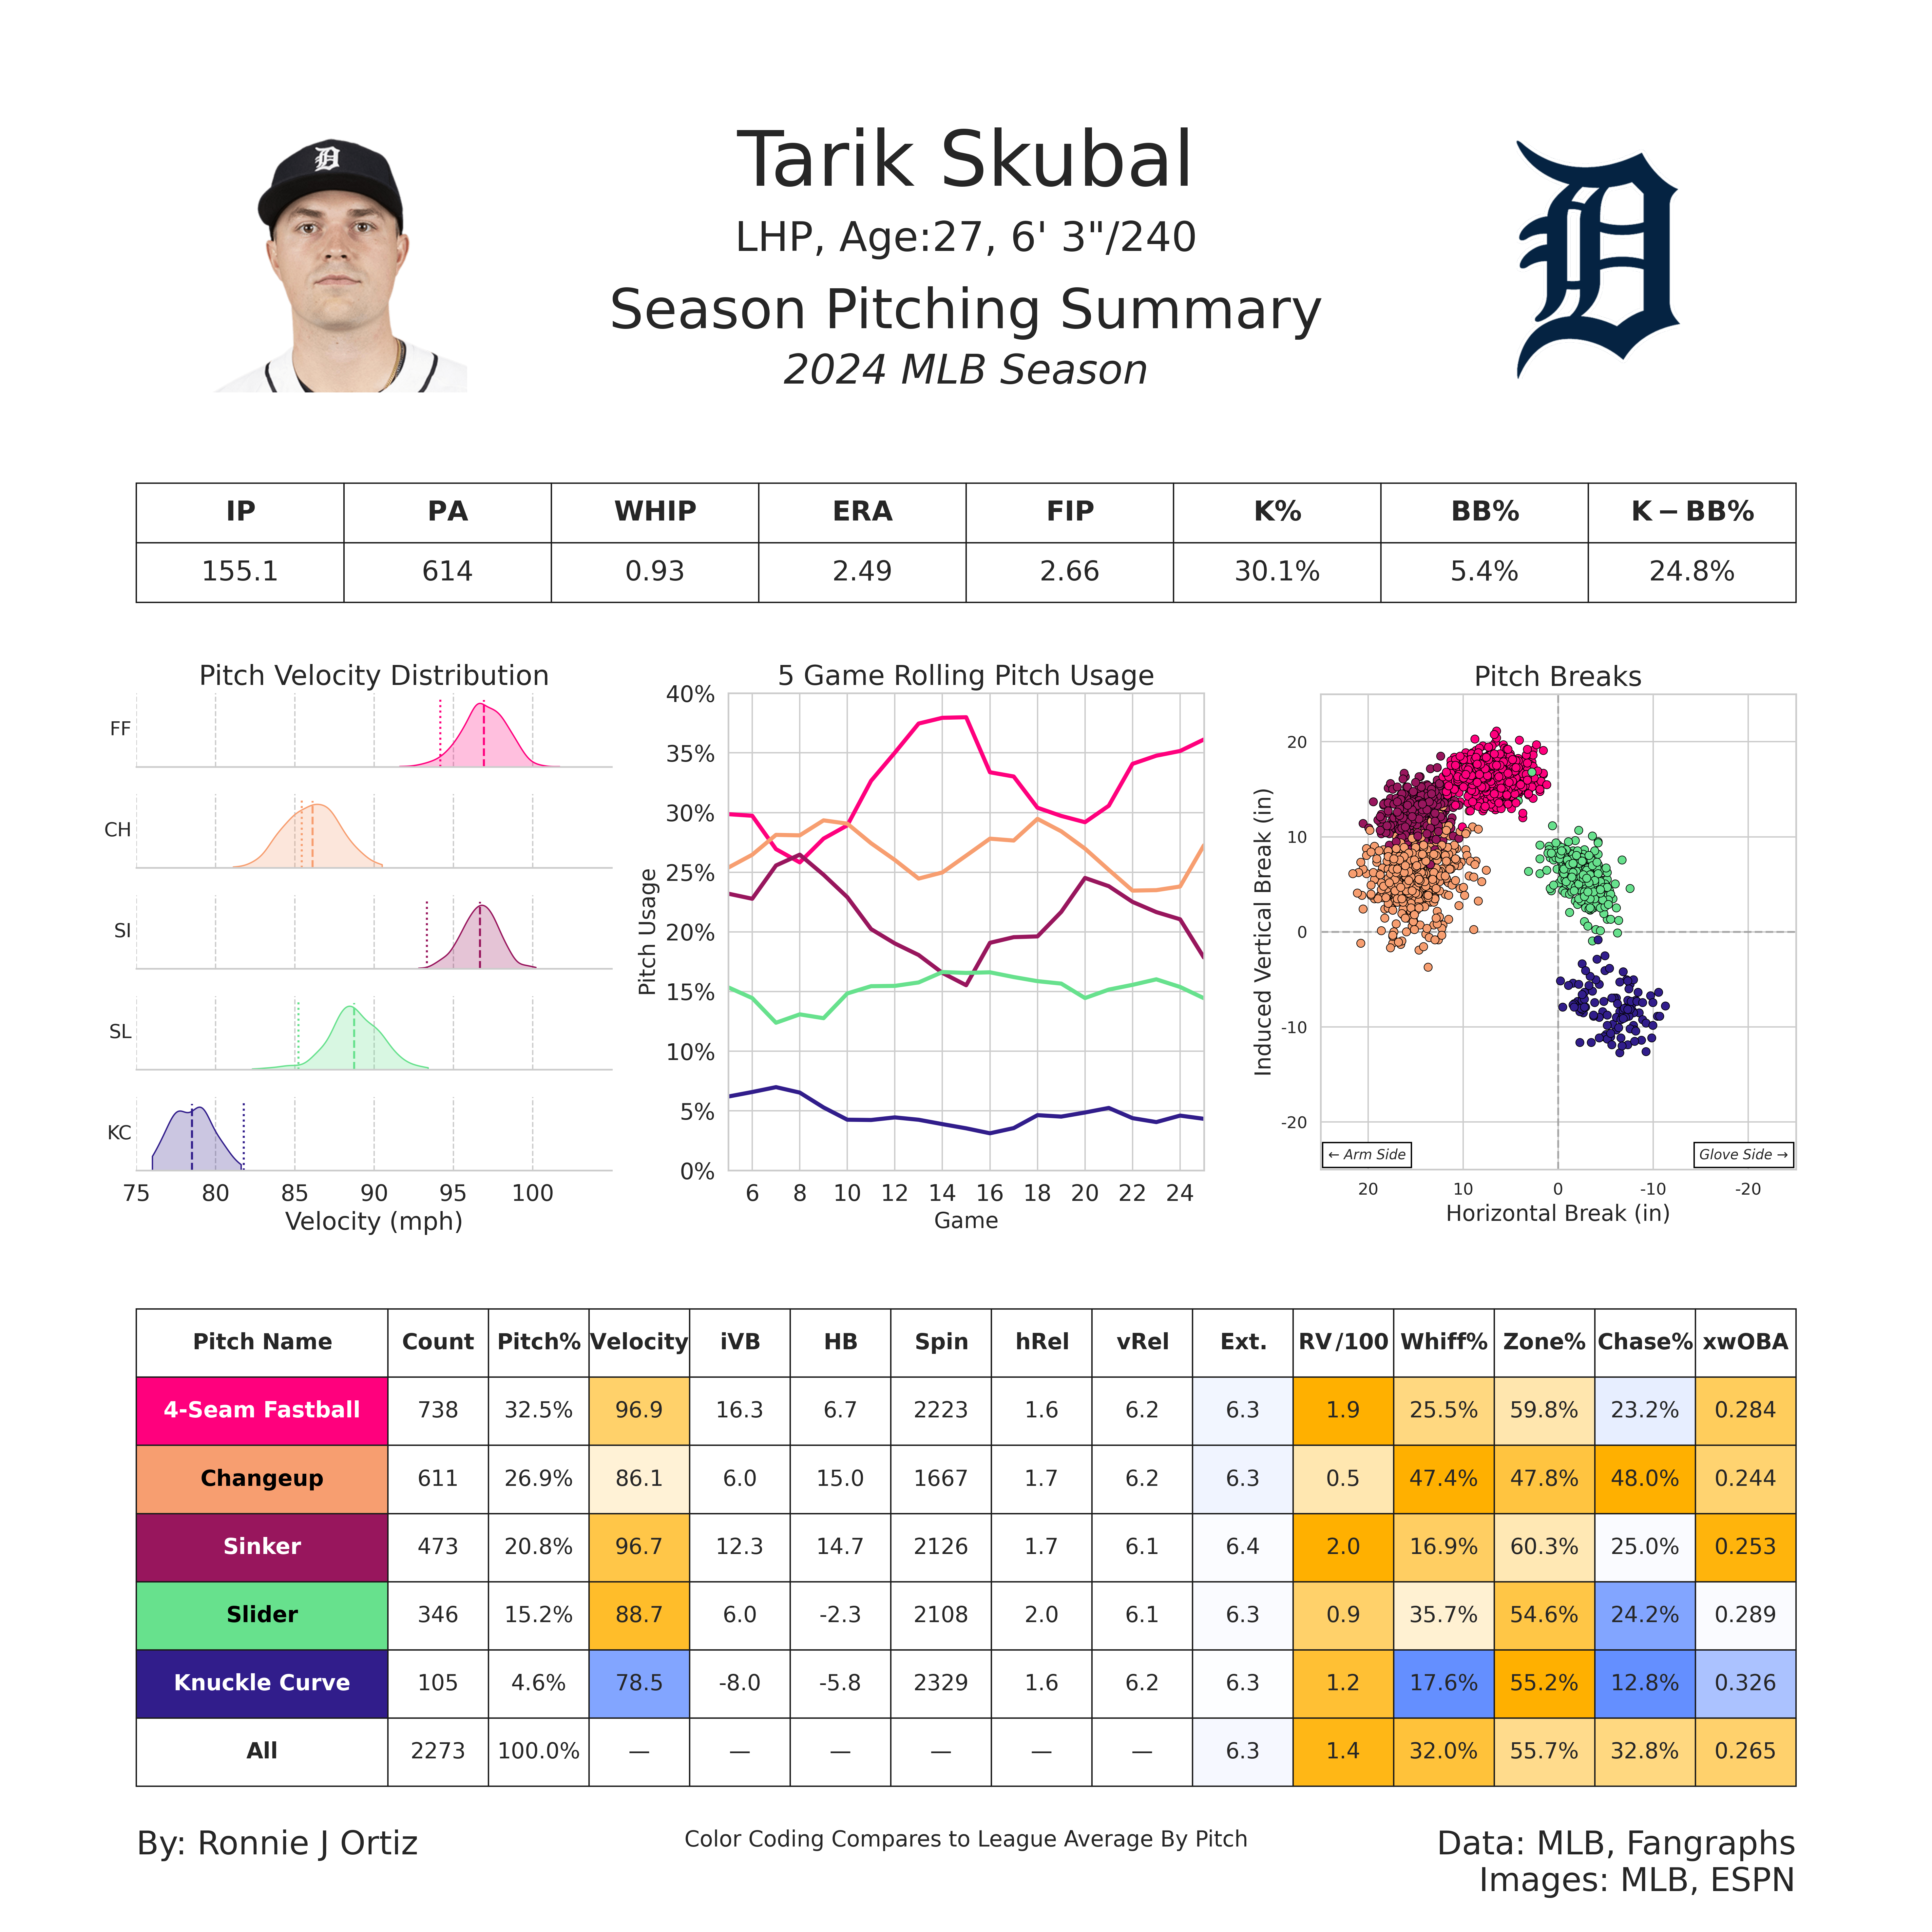

In [68]:
def pitching_dashboard(pitcher_id: str, df: pd.DataFrame, stats: list):
  # Create a 20 by 20 figure
  df = df_processing(df)
  fig = plt.figure(figsize=(20,20))

  # Create a gridspec layout with 8 columns and 6 rows
  # Include border plots for the header, footer, left, and right
  gs = gridspec.GridSpec(6, 8, height_ratios=[2,20,9,36,36,7], width_ratios=[1,18,18,18,18,18,18,1])

  # Define the positions of each subplot in the grid
  ax_headshot = fig.add_subplot(gs[1,1:3])
  ax_bio = fig.add_subplot(gs[1,3:5])
  ax_logo = fig.add_subplot(gs[1,5:7])

  ax_season_table = fig.add_subplot(gs[2,1:7])

  ax_plot_1 = fig.add_subplot(gs[3,1:3])
  ax_plot_2 = fig.add_subplot(gs[3,3:5])
  ax_plot_3 = fig.add_subplot(gs[3,5:7])

  ax_table = fig.add_subplot(gs[4,1:7])

  ax_footer = fig.add_subplot(gs[-1,1:7])
  ax_header = fig.add_subplot(gs[0,1:7])
  ax_left = fig.add_subplot(gs[:,0])
  ax_right = fig.add_subplot(gs[:,-1])

  # Hide axes for footer, header, left, and right
  ax_footer.axis('off')
  ax_header.axis('off')
  ax_left.axis('off')
  ax_right.axis('off')

  # Call the functions
  fontsize = 16
  fangraphs_pitcher_stats(pitcher_id, ax_season_table, stats, season=2024, fontsize=20)
  pitch_table(df, ax_table, fontsize=fontsize)

  player_headshot(pitcher_id, ax=ax_headshot)
  player_bio(pitcher_id, ax=ax_bio)
  plot_logo(pitcher_id, ax=ax_logo)

  velocity_kdes(df=df, ax=ax_plot_1, gs=gs, gs_x=[3,4], gs_y=[1,3], fig=fig, df_statcast_group=df_statcast_group)
  rolling_pitch_usage(df, ax=ax_plot_2, window=5)
  break_plot(df=df, ax=ax_plot_3)

  # Add footer text
  ax_footer.text(0, 1, 'By: Ronnie J Ortiz', ha='left', va='top', fontsize=24)
  ax_footer.text(0.5, 1, 'Color Coding Compares to League Average By Pitch', ha='center', va='top', fontsize=16)
  ax_footer.text(1, 1, 'Data: MLB, Fangraphs\nImages: MLB, ESPN', ha='right', va='top', fontsize=24)

  # Adjust the spacing between subplots
  plt.tight_layout()

  # Show the figure
  plt.show()


# Define the statistics to display in the dashboard
stats = ['IP','TBF','WHIP','ERA', 'FIP', 'K%', 'BB%', 'K-BB%']
pitcher_id = 669373
df_pyb = pyb.statcast_pitcher('2024-03-28', '2024-10-01', pitcher_id)

# Call the pitching_dashboard function with the pitcher ID and the list of statistics
pitching_dashboard(pitcher_id, df_pyb, stats)